# Importing Data

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

file_names = [
    'nisp_hist.csv', 'bbri_hist.csv', 'bbtn_hist.csv', 'bbyb_hist.csv',
    'bmri_hist.csv', 'bnga_hist.csv', 'bris_hist.csv', 'bbca_hist.csv',
    'bbni_hist.csv', 'bank_hist.csv', 'arto_hist.csv', 'mega_hist.csv'
]

bank_names = [
    'NISP', 'BBRI', 'BBTN', 'BBYB', 'BMRI', 'BNGA', 'BRIS', 'BBCA',
    'BBNI', 'BANK', 'ARTO', 'MEGA'
]

folder_path = "/content"

data_bank = {}

for file_name, bank_name in zip(file_names, bank_names):
    file_path = f"{folder_path}/{file_name}"
    try:
        df = pd.read_csv(file_path)
        data_bank[bank_name] = df[['Date', 'Close']].rename(columns={'Close': bank_name})
        print(f"Berhasil membaca data untuk {bank_name}")
    except FileNotFoundError:
        print(f"File untuk {bank_name} tidak ditemukan di {file_path}")
    except KeyError:
        print(f"Kolom 'date' atau 'Close' tidak ditemukan di dataset {bank_name}")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca data untuk {bank_name}: {e}")

df1 = pd.DataFrame()
for bank_name, df in data_bank.items():
    if df1.empty:
        df1 = df
    else:
        df1 = pd.merge(df1, df, on='Date', how='outer')

df1.to_csv(f"{folder_path}/combined_close.csv", index=False)

df1.head()

Berhasil membaca data untuk NISP
Berhasil membaca data untuk BBRI
Berhasil membaca data untuk BBTN
Berhasil membaca data untuk BBYB
Berhasil membaca data untuk BMRI
Berhasil membaca data untuk BNGA
Berhasil membaca data untuk BRIS
Berhasil membaca data untuk BBCA
Berhasil membaca data untuk BBNI
Berhasil membaca data untuk BANK
Berhasil membaca data untuk ARTO
Berhasil membaca data untuk MEGA


,Date,NISP,BBRI,BBTN,BBYB,BMRI,BNGA,BRIS,BBCA,BBNI,BANK,ARTO,MEGA
0,2014-04-21 00:00:00+07:00,598.604431,1238.436401,975.322571,NaN,1725.420532,731.913696,NaN,1880.453247,1877.557129,NaN,NaN,822.389038
1,2014-04-22 00:00:00+07:00,598.604431,1256.920532,971.628357,NaN,1729.810791,731.913696,NaN,1859.418945,1877.557129,NaN,NaN,807.628235
2,2014-04-23 00:00:00+07:00,598.604431,1235.355835,964.239441,NaN,1738.591797,728.377991,NaN,1859.418945,1877.557129,NaN,NaN,803.410767
3,2014-04-24 00:00:00+07:00,598.604431,1238.436401,894.045715,NaN,1734.201294,728.377991,NaN,1851.005127,1849.809692,NaN,NaN,803.410767
4,2014-04-25 00:00:00+07:00,598.604431,1232.274902,908.823364,NaN,1738.591797,728.377991,NaN,1851.005127,1868.307861,NaN,NaN,822.389038


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2475 non-null   object 
 1   NISP    2475 non-null   float64
 2   BBRI    2475 non-null   float64
 3   BBTN    2475 non-null   float64
 4   BBYB    2297 non-null   float64
 5   BMRI    2475 non-null   float64
 6   BNGA    2474 non-null   float64
 7   BRIS    1466 non-null   float64
 8   BBCA    2475 non-null   float64
 9   BBNI    2475 non-null   float64
 10  BANK    778 non-null    float64
 11  ARTO    2045 non-null   float64
 12  MEGA    2475 non-null   float64
dtypes: float64(12), object(1)
memory usage: 251.5+ KB


In [ ]:
df1 = df1.tail(778)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 1697 to 2474
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    778 non-null    object 
 1   NISP    778 non-null    float64
 2   BBRI    778 non-null    float64
 3   BBTN    778 non-null    float64
 4   BBYB    778 non-null    float64
 5   BMRI    778 non-null    float64
 6   BNGA    778 non-null    float64
 7   BRIS    778 non-null    float64
 8   BBCA    778 non-null    float64
 9   BBNI    778 non-null    float64
 10  BANK    778 non-null    float64
 11  ARTO    778 non-null    float64
 12  MEGA    778 non-null    float64
dtypes: float64(12), object(1)
memory usage: 79.1+ KB


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1 = df1[df1['Date'] >= '2022-04-18']

In [ ]:
df1

,Date,NISP,BBRI,BBTN,BBYB,BMRI,BNGA,BRIS,BBCA,BBNI,BANK,ARTO,MEGA
1995,2022-04-18 00:00:00+07:00,570.442993,4063.734375,1330.590088,1811.448486,3450.868408,986.968872,1547.010986,7315.464844,3854.148682,1866.850830,12825.0,5660.846680
1996,2022-04-19 00:00:00+07:00,570.442993,4081.596924,1347.119141,1769.430420,3428.239746,982.769043,1508.694824,7244.209961,3842.712158,1866.850830,12575.0,5614.823242
1997,2022-04-20 00:00:00+07:00,588.131165,4331.672852,1376.044922,1774.098999,3552.697266,995.620728,1489.536743,7267.961426,4105.754883,1866.850830,12400.0,5637.834473
1998,2022-04-21 00:00:00+07:00,574.865051,4287.016602,1454.558105,1764.761719,3756.355225,977.352478,1494.326294,7529.228516,4288.741211,1884.630371,12425.0,5752.892578
1999,2022-04-22 00:00:00+07:00,566.020935,4242.359863,1466.954956,1736.749634,3745.040771,963.651245,1470.378662,7481.724609,4277.304688,1840.181519,12400.0,5706.869141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,2024-04-04 00:00:00+07:00,1360.000000,5700.000000,1515.000000,270.000000,6875.000000,2110.000000,2730.000000,9850.000000,5350.000000,980.000000,2580.0,5050.000000
2471,2024-04-05 00:00:00+07:00,1350.000000,5650.000000,1500.000000,268.000000,6825.000000,2100.000000,2700.000000,9825.000000,5300.000000,1000.000000,2530.0,5150.000000
2472,2024-04-16 00:00:00+07:00,1300.000000,5350.000000,1400.000000,252.000000,6625.000000,2020.000000,2550.000000,9475.000000,5200.000000,980.000000,2300.0,5075.000000
2473,2024-04-17 00:00:00+07:00,1300.000000,5300.000000,1375.000000,260.000000,6625.000000,2040.000000,2480.000000,9525.000000,5250.000000,955.000000,2120.0,5175.000000


In [ ]:
dates = pd.to_datetime(df1['Date'])

# Create a date range from the minimum to the maximum date in the dataset
full_range = pd.date_range(start=dates.min(), end=dates.max())

# Identify the missing dates
missing_dates = full_range.difference(dates)

In [ ]:
missing_dates

DatetimeIndex(['2022-04-23 00:00:00+07:00', '2022-04-24 00:00:00+07:00',
               '2022-04-29 00:00:00+07:00', '2022-04-30 00:00:00+07:00',
               '2022-05-01 00:00:00+07:00', '2022-05-02 00:00:00+07:00',
               '2022-05-03 00:00:00+07:00', '2022-05-04 00:00:00+07:00',
               '2022-05-05 00:00:00+07:00', '2022-05-06 00:00:00+07:00',
               ...
               '2024-04-06 00:00:00+07:00', '2024-04-07 00:00:00+07:00',
               '2024-04-08 00:00:00+07:00', '2024-04-09 00:00:00+07:00',
               '2024-04-10 00:00:00+07:00', '2024-04-11 00:00:00+07:00',
               '2024-04-12 00:00:00+07:00', '2024-04-13 00:00:00+07:00',
               '2024-04-14 00:00:00+07:00', '2024-04-15 00:00:00+07:00'],
              dtype='datetime64[ns, UTC+07:00]', length=252, freq=None)

In [ ]:
holidays = pd.DataFrame({
    'holiday': 'market_closed',
    'ds': pd.to_datetime(missing_dates),
    'lower_window': 0,
    'upper_window': 0,
})

holidays['ds'] = holidays['ds'].dt.strftime('%Y-%m-%d')

holidays

,holiday,ds,lower_window,upper_window
0,market_closed,2022-04-23,0,0
1,market_closed,2022-04-24,0,0
2,market_closed,2022-04-29,0,0
3,market_closed,2022-04-30,0,0
4,market_closed,2022-05-01,0,0
...,...,...,...,...
247,market_closed,2024-04-11,0,0
248,market_closed,2024-04-12,0,0
249,market_closed,2024-04-13,0,0
250,market_closed,2024-04-14,0,0


In [ ]:
df1.to_csv("data_close.csv")

Data disimpan ke csv terlebih dahulu dan diupload ke google sheet agar tidak perlu upload ulang lagi 12 dataset, untuk memudahkan proses selanjutnya

In [ ]:
data = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT1gDKWJFQ87o_gRGvYKhmtEh2o8GiBQzEd_b66z65fBnYVX_MJUhfu-xq3ws7ljcWzbAzuNFzjxosQ/pub?gid=2056150790&single=true&output=csv"

In [ ]:
df1 = pd.read_csv(data, parse_dates=True)

In [ ]:
def plot_separate_stocks(data):
    # Pastikan 'Date' adalah datetime dan konversi menjadi ordinal untuk perhitungan tren
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

    # Jumlah saham (hanya mengabaikan kolom 'Date' dan 'Date_ordinal')
    num_stocks = len(data.columns) - 2  # Mengurangi kolom 'Date' dan 'Date_ordinal'
    num_rows = num_stocks // 4 + (num_stocks % 4 > 0)  # Menambah baris jika ada sisa
    fig, axs = plt.subplots(num_rows, 4, figsize=(20, 15))
    fig.suptitle('Close Price of Each Stock Over Time with Trend Lines', fontsize=16)

    # Loop melalui kolom stok yang dimulai setelah 'Date' dan 'Date_ordinal'
    for i, column in enumerate(data.columns[1:-1]):  # -1 untuk menghindari 'Date_ordinal'
        ax = axs.flatten()[i]  # Flatten axs array untuk indexing yang lebih mudah
        ax.plot(data['Date'], data[column], label=column)

        # Menambahkan garis tren
        z = np.polyfit(data['Date_ordinal'], data[column], 1)
        p = np.poly1d(z)
        ax.plot(data['Date'], p(data['Date_ordinal']), "r--", label='Trend Line')

        ax.set_title(column)
        ax.set_xlabel('Date')
        ax.set_ylabel('Close Price')
        ax.grid(True)
        ax.legend()
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

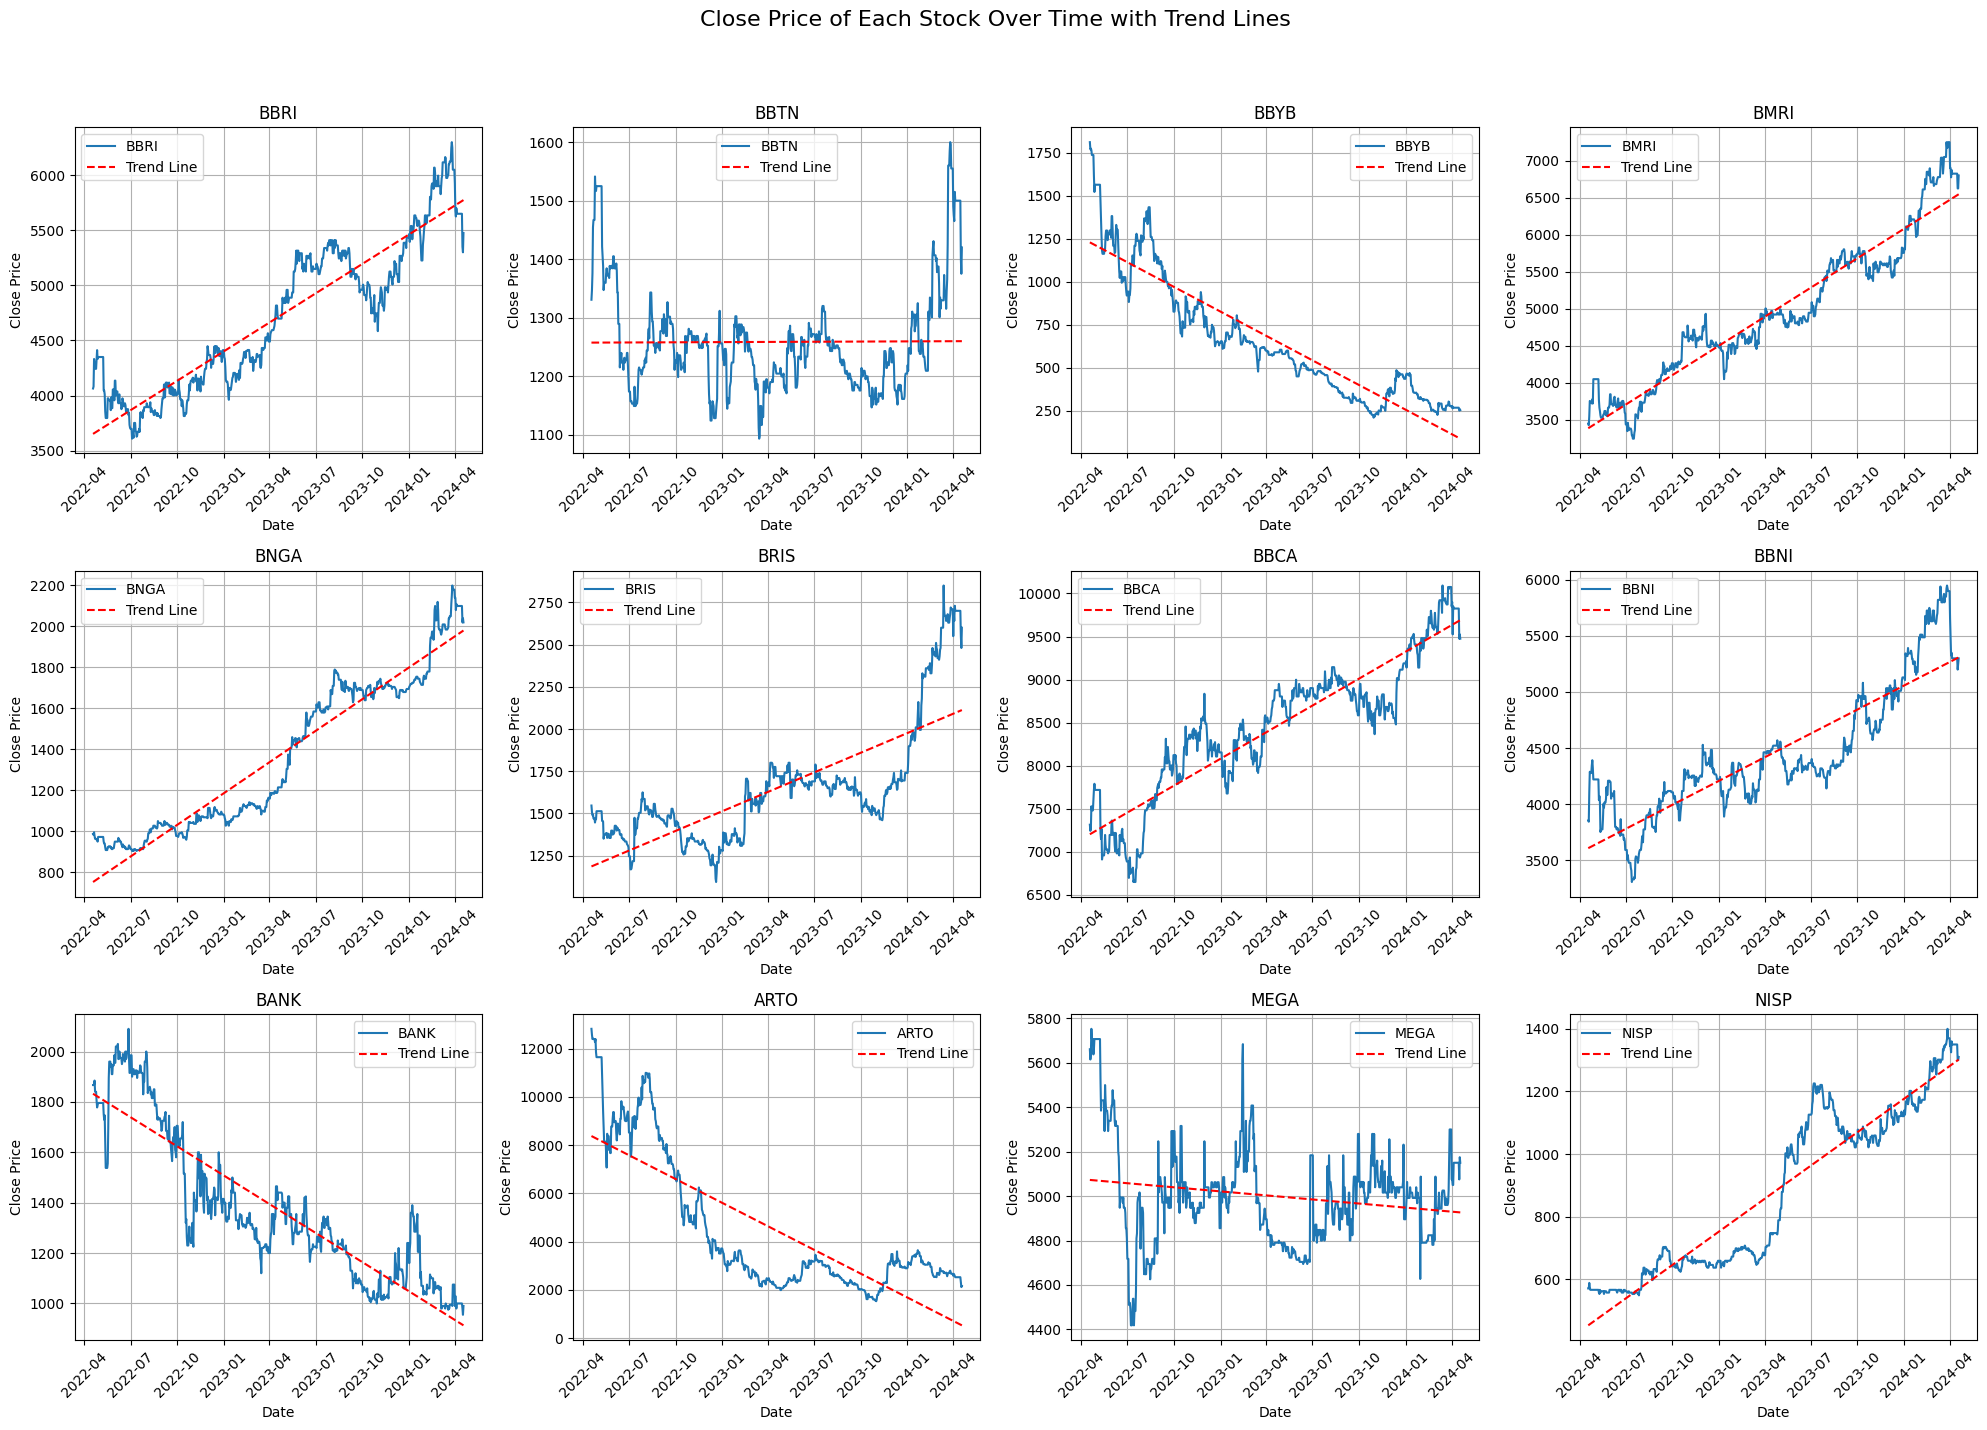

In [ ]:
plot_separate_stocks(df1)

# Data Wrangling

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          732 non-null    datetime64[ns]
 1   BBRI          732 non-null    float64       
 2   BBTN          732 non-null    float64       
 3   BBYB          732 non-null    float64       
 4   BMRI          732 non-null    float64       
 5   BNGA          732 non-null    float64       
 6   BRIS          732 non-null    float64       
 7   BBCA          732 non-null    float64       
 8   BBNI          732 non-null    float64       
 9   BANK          732 non-null    float64       
 10  ARTO          732 non-null    int64         
 11  MEGA          732 non-null    float64       
 12  NISP          732 non-null    float64       
 13  Date_ordinal  732 non-null    int64         
dtypes: datetime64[ns](1), float64(11), int64(2)
memory usage: 80.2 KB


In [ ]:
df1.isna().sum()

Date            0
BBRI            0
BBTN            0
BBYB            0
BMRI            0
BNGA            0
BRIS            0
BBCA            0
BBNI            0
BANK            0
ARTO            0
MEGA            0
NISP            0
Date_ordinal    0
dtype: int64

In [ ]:
print(min(df1['Date']))
print(max(df1['Date']))

2022-04-18 00:00:00
2024-04-18 00:00:00


In [ ]:
df1 = df1.drop(columns="Date_ordinal")

In [ ]:
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    732 non-null    datetime64[ns]
 1   BBRI    732 non-null    float64       
 2   BBTN    732 non-null    float64       
 3   BBYB    732 non-null    float64       
 4   BMRI    732 non-null    float64       
 5   BNGA    732 non-null    float64       
 6   BRIS    732 non-null    float64       
 7   BBCA    732 non-null    float64       
 8   BBNI    732 non-null    float64       
 9   BANK    732 non-null    float64       
 10  ARTO    732 non-null    int64         
 11  MEGA    732 non-null    float64       
 12  NISP    732 non-null    float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 74.5 KB


In [ ]:
df1 = df1.set_index('Date')
df1 = df1.reindex(pd.date_range(start="2022-04-18", end="2024-04-18"))

In [ ]:
df1.head(10)

,BBRI,BBTN,BBYB,BMRI,BNGA,BRIS,BBCA,BBNI,BANK,ARTO,MEGA,NISP
2022-04-18,4063.734,1330.590,1811.448,3450.868,986.9689,1547.011,7315.465,3854.149,1866.851,12825,5660.847,570.4430
2022-04-19,4081.597,1347.119,1769.430,3428.240,982.7690,1508.695,7244.210,3842.712,1866.851,12575,5614.823,570.4430
2022-04-20,4331.673,1376.045,1774.099,3552.697,995.6207,1489.537,7267.961,4105.755,1866.851,12400,5637.834,588.1312
2022-04-21,4287.017,1454.558,1764.762,3756.355,977.3525,1494.326,7529.229,4288.741,1884.630,12425,5752.893,574.8651
2022-04-22,4242.360,1466.955,1736.750,3745.041,963.6512,1470.379,7481.725,4277.305,1840.182,12400,5706.869,566.0209
2022-04-23,4242.360,1466.955,1736.750,3745.041,963.6512,1470.379,7481.725,4277.305,1840.182,12400,5706.869,566.0209
2022-04-24,4242.360,1466.955,1736.750,3745.041,963.6512,1470.379,7481.725,4277.305,1840.182,12400,5706.869,566.0209
2022-04-25,4322.742,1541.336,1736.750,3722.412,959.0842,1446.431,7600.483,4345.924,1804.623,12275,5637.834,566.0209
2022-04-26,4412.055,1516.542,1615.364,3778.984,959.0842,1465.589,7719.240,4391.671,1777.953,12400,5660.847,566.0209
2022-04-27,4331.673,1516.542,1521.990,3722.412,949.9501,1465.589,7790.495,4323.051,1786.843,11850,5706.869,566.0209


In [ ]:
df1 = df1.fillna(method='ffill').fillna(method='bfill')

In [ ]:
df1.head(10)

,BBRI,BBTN,BBYB,BMRI,BNGA,BRIS,BBCA,BBNI,BANK,ARTO,MEGA,NISP
2022-04-18,4063.734,1330.590,1811.448,3450.868,986.9689,1547.011,7315.465,3854.149,1866.851,12825,5660.847,570.4430
2022-04-19,4081.597,1347.119,1769.430,3428.240,982.7690,1508.695,7244.210,3842.712,1866.851,12575,5614.823,570.4430
2022-04-20,4331.673,1376.045,1774.099,3552.697,995.6207,1489.537,7267.961,4105.755,1866.851,12400,5637.834,588.1312
2022-04-21,4287.017,1454.558,1764.762,3756.355,977.3525,1494.326,7529.229,4288.741,1884.630,12425,5752.893,574.8651
2022-04-22,4242.360,1466.955,1736.750,3745.041,963.6512,1470.379,7481.725,4277.305,1840.182,12400,5706.869,566.0209
2022-04-23,4242.360,1466.955,1736.750,3745.041,963.6512,1470.379,7481.725,4277.305,1840.182,12400,5706.869,566.0209
2022-04-24,4242.360,1466.955,1736.750,3745.041,963.6512,1470.379,7481.725,4277.305,1840.182,12400,5706.869,566.0209
2022-04-25,4322.742,1541.336,1736.750,3722.412,959.0842,1446.431,7600.483,4345.924,1804.623,12275,5637.834,566.0209
2022-04-26,4412.055,1516.542,1615.364,3778.984,959.0842,1465.589,7719.240,4391.671,1777.953,12400,5660.847,566.0209
2022-04-27,4331.673,1516.542,1521.990,3722.412,949.9501,1465.589,7790.495,4323.051,1786.843,11850,5706.869,566.0209


<Axes: >

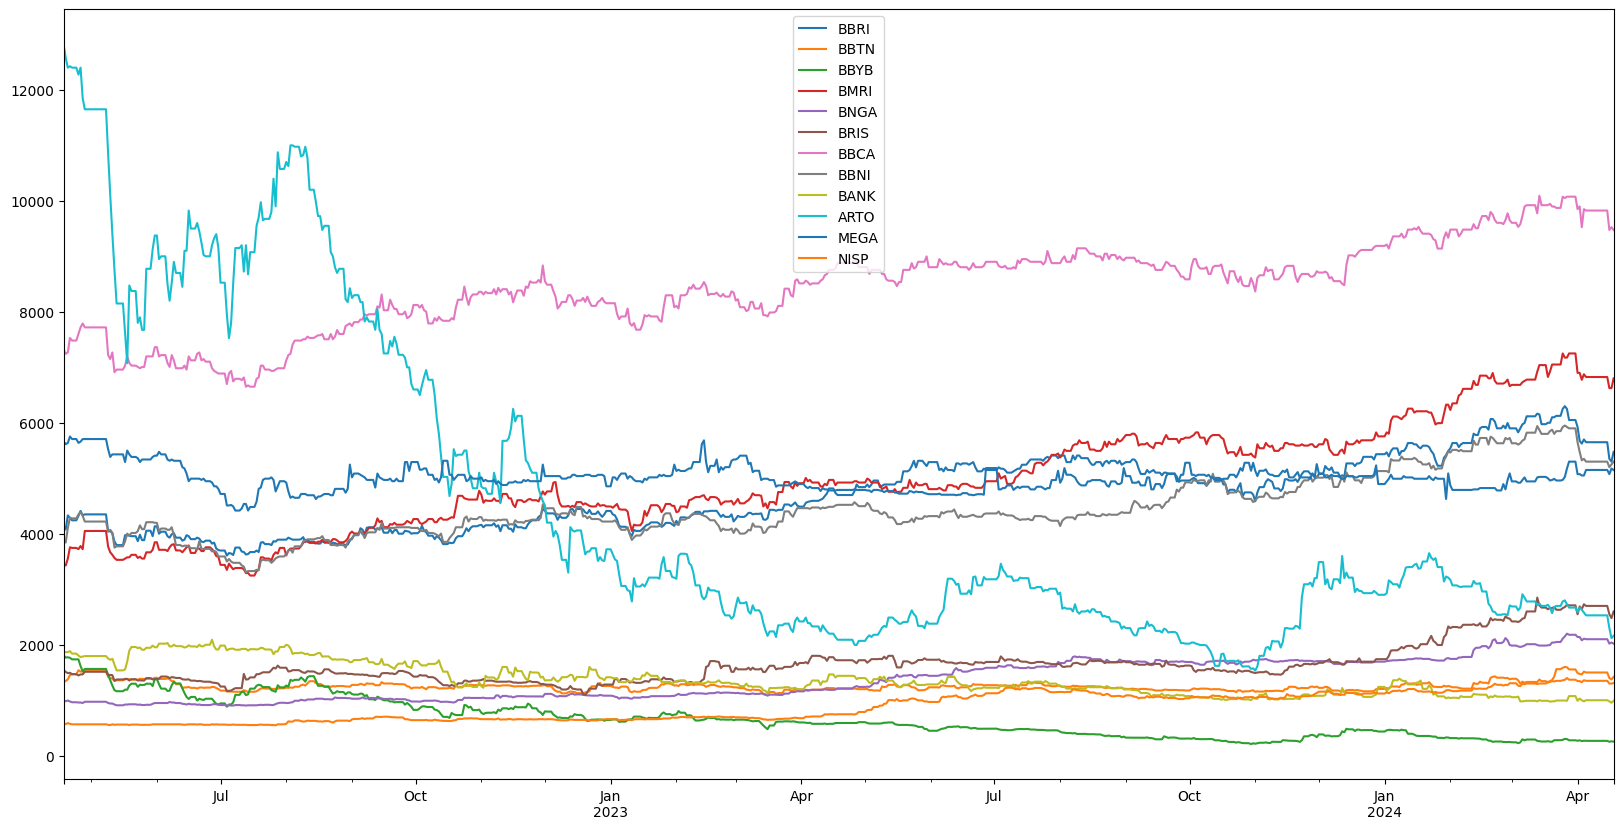

In [ ]:
df1.plot()

# EDA

In [ ]:
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decomposition(df, column_name):

    result_mul = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend='freq')
    result_add = seasonal_decompose(df[column_name], model='additive', extrapolate_trend='freq')

    return result_mul, result_add

def plot(result_mul, result_add):

    fig = px.line(title='Multiplicative Decomposition')
    fig.add_scatter(x=result_mul.trend.index, y=result_mul.trend, mode='lines', name='Trend')
    fig.add_scatter(x=result_mul.seasonal.index, y=result_mul.seasonal, mode='lines', name='Seasonal')
    fig.add_scatter(x=result_mul.resid.index, y=result_mul.resid, mode='lines', name='Residual')

    fig.update_layout(xaxis_title='Date', yaxis_title='Value')
    fig.show()

    fig = px.line(title='Additive Decomposition')
    fig.add_scatter(x=result_add.trend.index, y=result_add.trend, mode='lines', name='Trend')
    fig.add_scatter(x=result_add.seasonal.index, y=result_add.seasonal, mode='lines', name='Seasonal')
    fig.add_scatter(x=result_add.resid.index, y=result_add.resid, mode='lines', name='Residual')

    fig.update_layout(xaxis_title='Date', yaxis_title='Value')
    fig.show()

In [ ]:
result_mul, result_add = seasonal_decomposition(df1, 'BBRI')

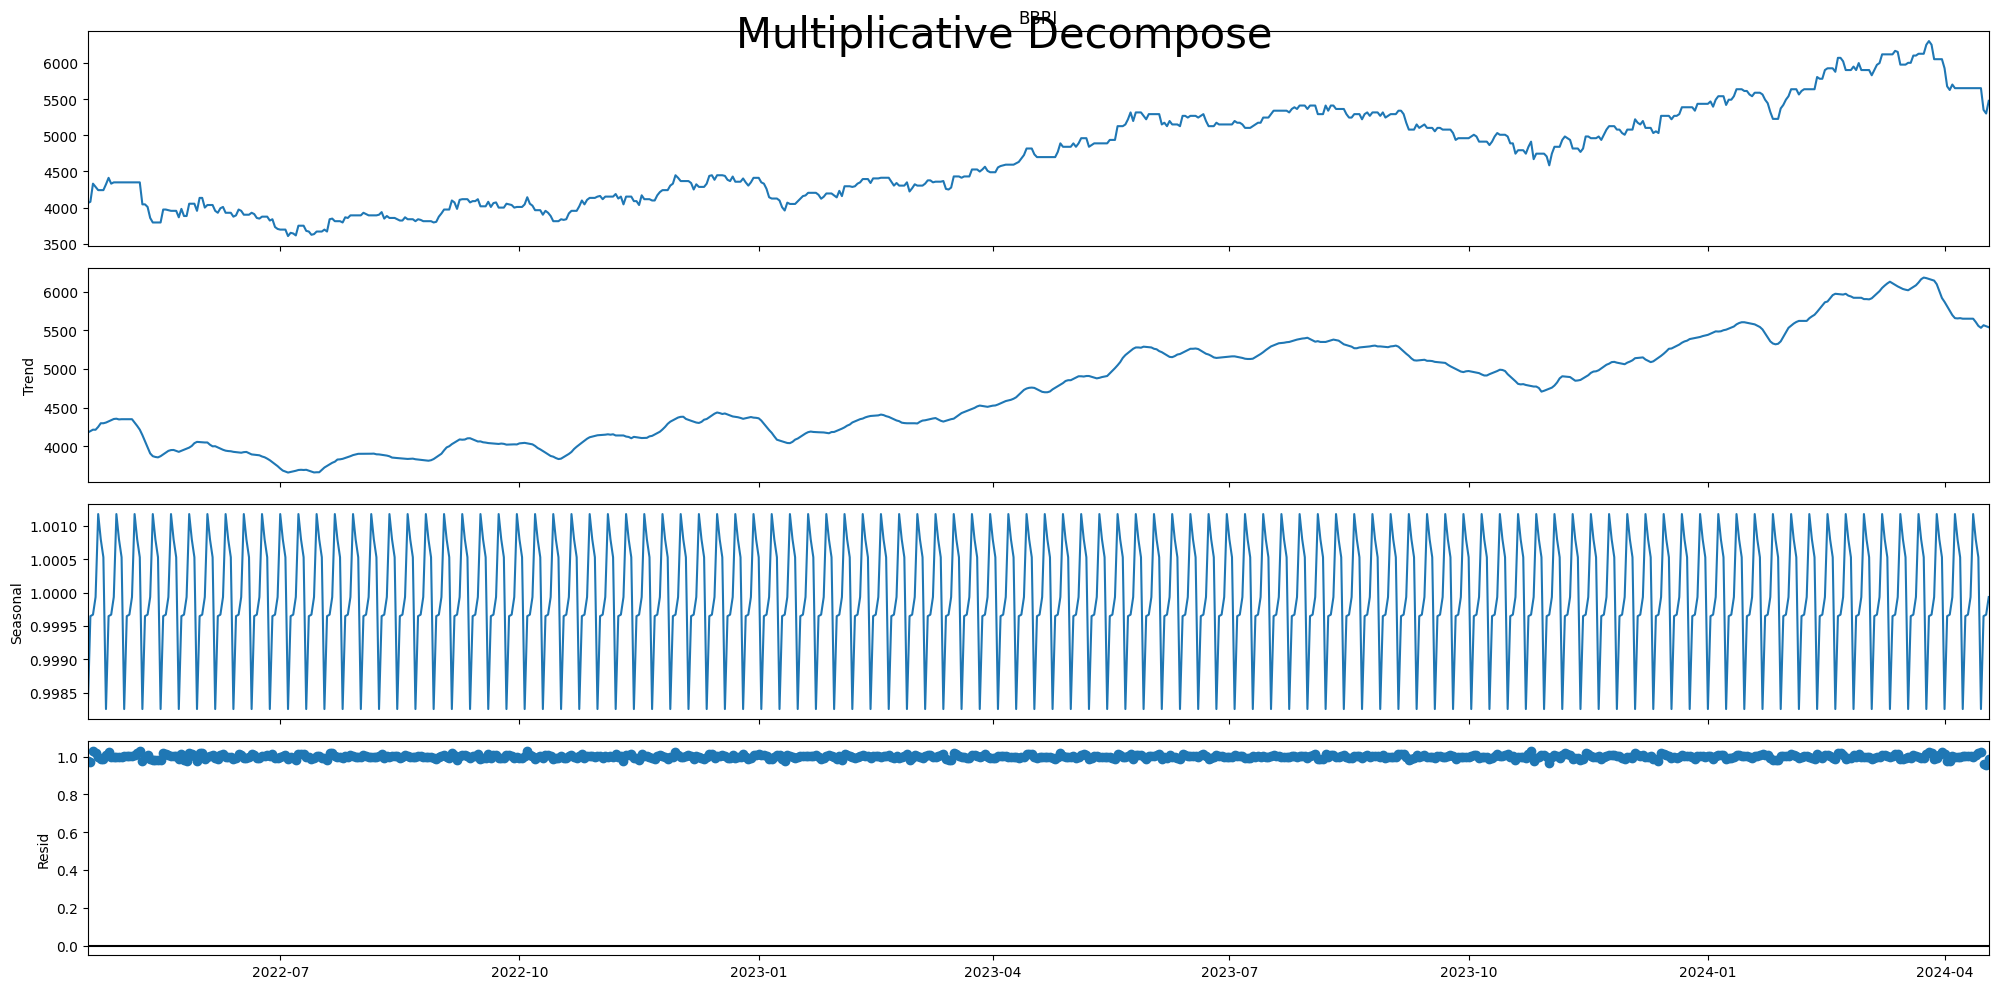

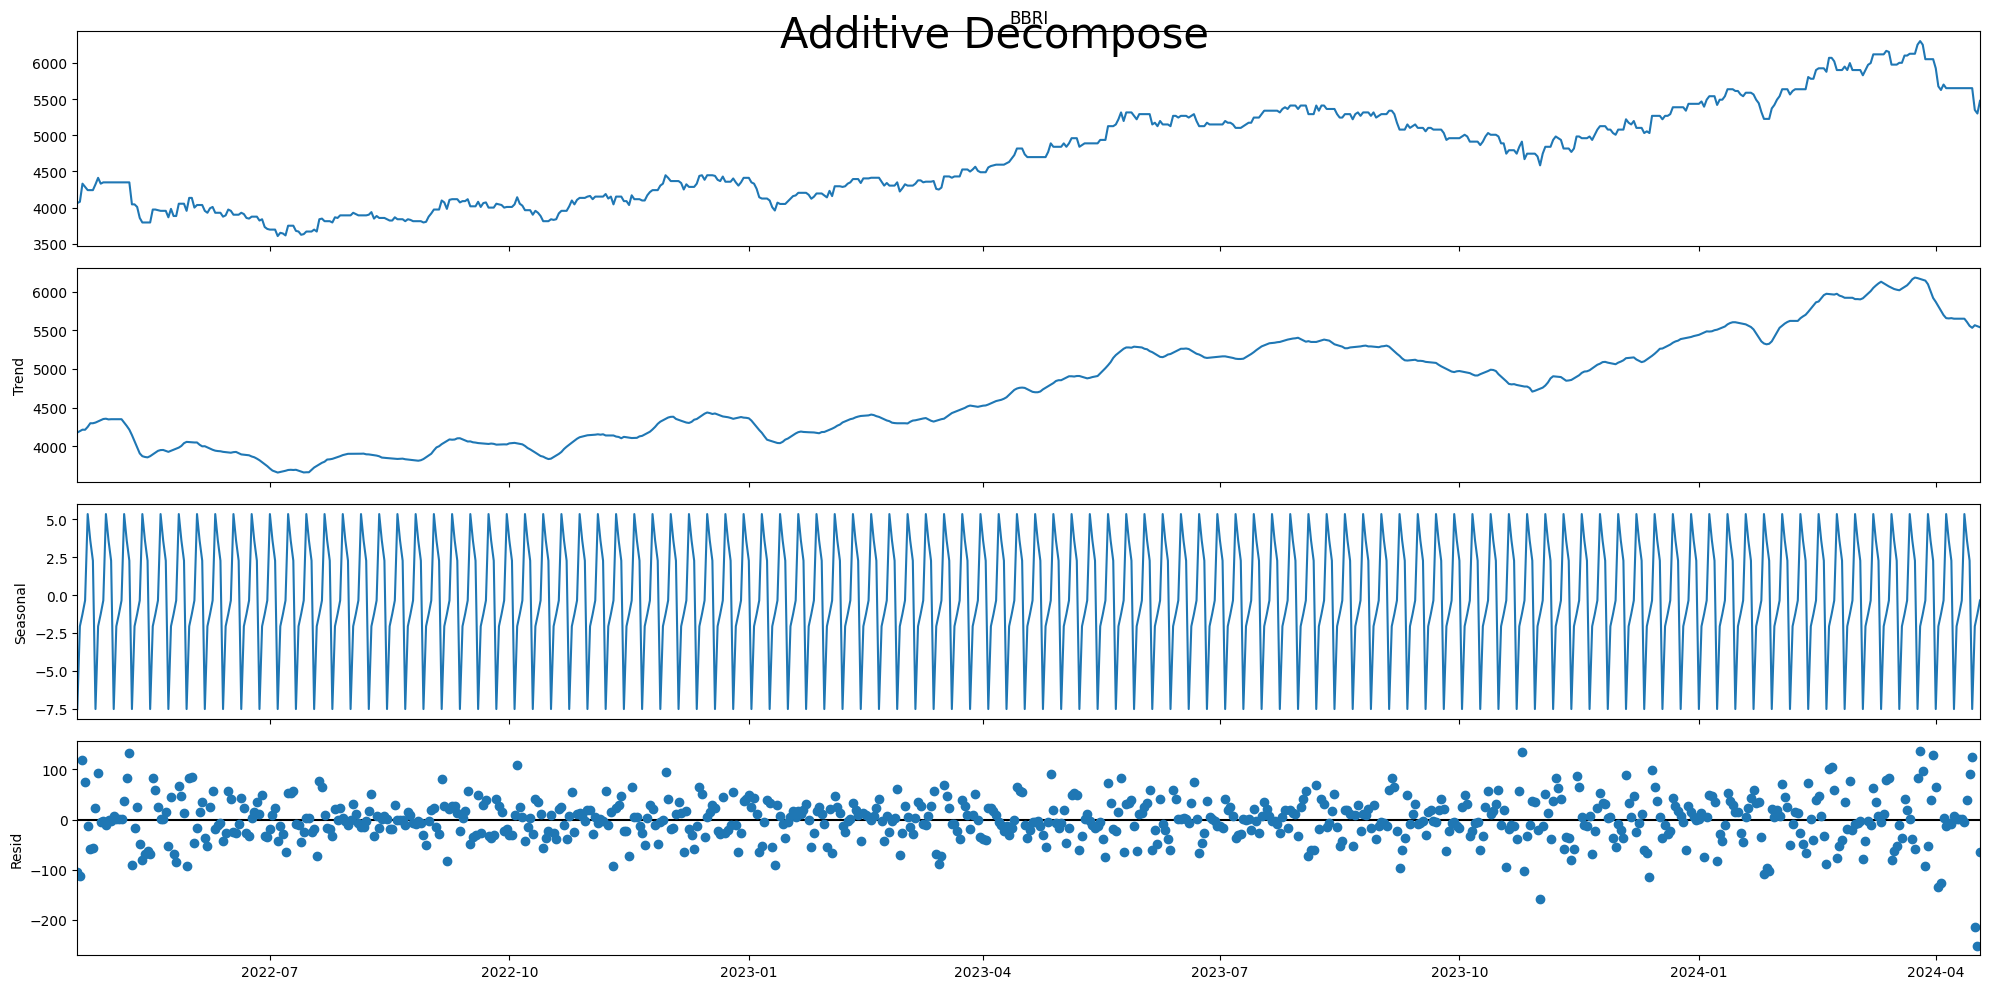

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (20, 10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
result_add.plot().suptitle('Additive Decompose', fontsize=30)
plt.show()

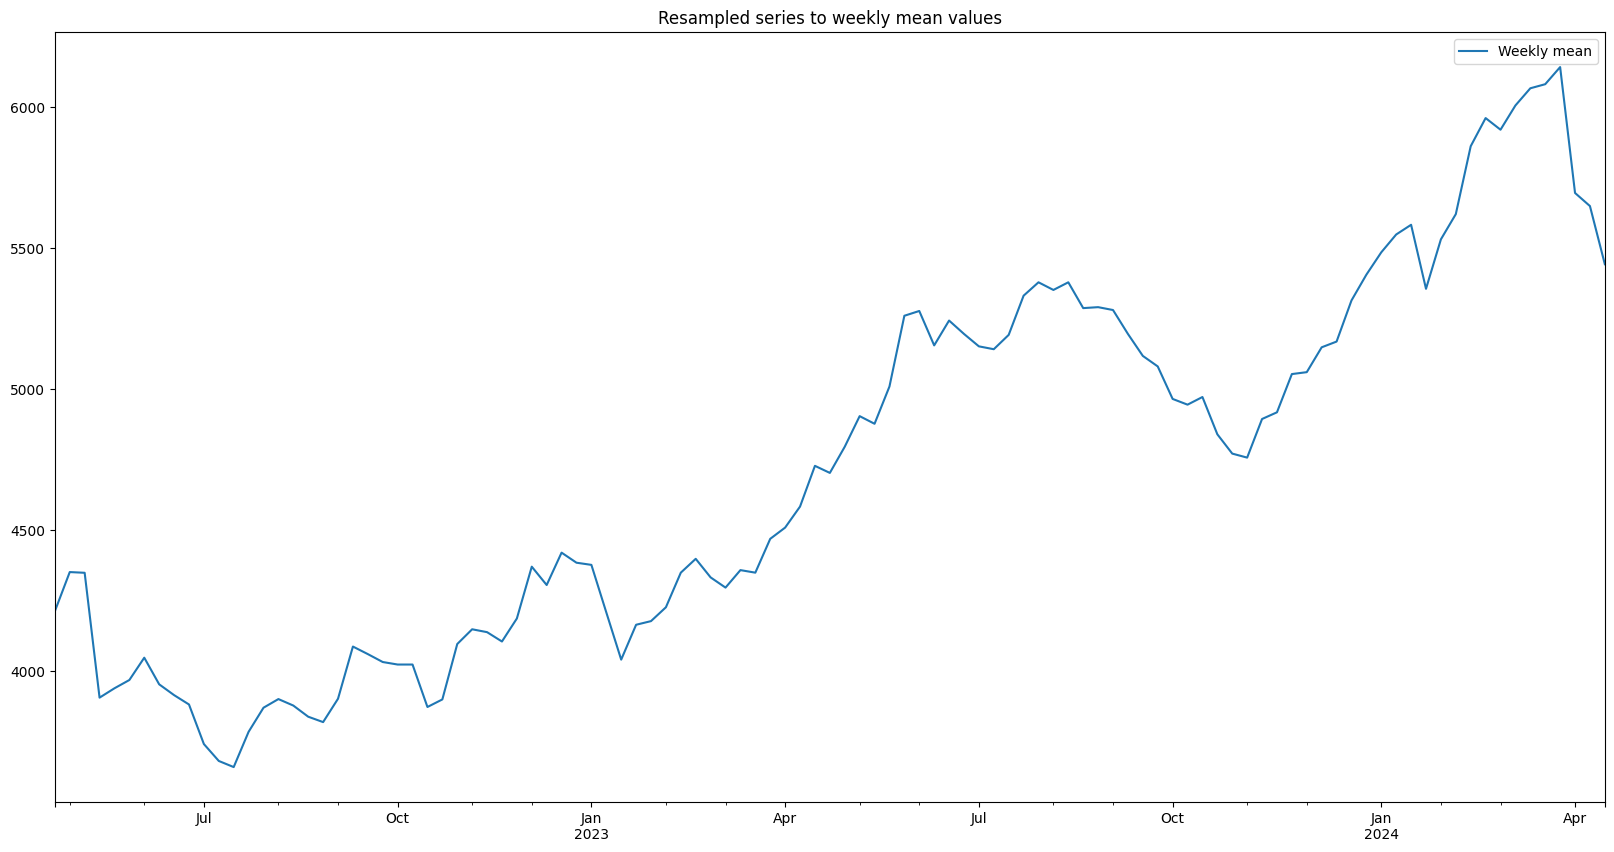

In [ ]:
# Looking for weekly seasonality
resample = df1.resample('W')
weekly_mean = resample.mean()
weekly_mean.BBRI.plot(label='Weekly mean')
plt.title("Resampled series to weekly mean values")
plt.legend()

/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-97-8aab66149948>:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(X, y, degree)


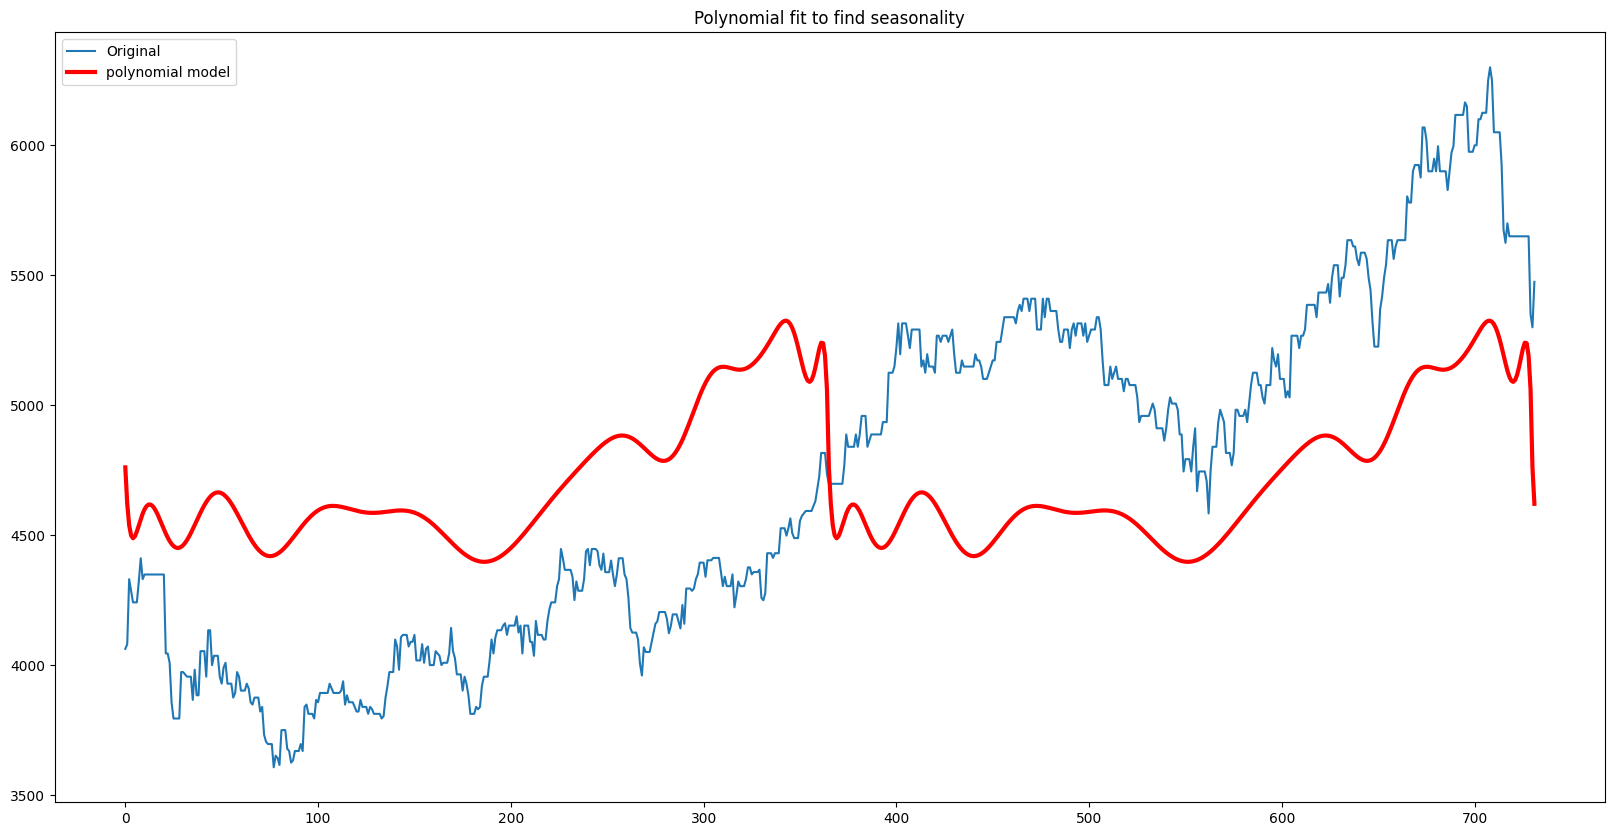

In [ ]:
# Fix xticks to show dates
# fit polynomial: x^2*b1 + x*b2 + ... + bn
series = df1.BBRI.values
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100
coef = np.polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

# Modeling


In [ ]:
pip install pmdarima

In [ ]:
from statsmodels.tsa.ar_model import AR
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm
from prophet import Prophet

In [ ]:
#prepare data before modeling
# We split our dataset to be able to evaluate our models

resultsDict = {}
predictionsDict = {}

split_date = '2023-11-24'
df_training = df1.loc[df1.index <= split_date]
df_test = df1.loc[df1.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

586 days of training data 
 146 days of testing data 


In [ ]:
df_test.tail(5)

,BBRI,BBTN,BBYB,BMRI,BNGA,BRIS,BBCA,BBNI,BANK,ARTO,MEGA,NISP
2024-04-14,5650.0,1500.0,268.0,6825.0,2100.0,2700.0,9825.0,5300.0,1000.0,2530,5150.0,1350.0
2024-04-15,5650.0,1500.0,268.0,6825.0,2100.0,2700.0,9825.0,5300.0,1000.0,2530,5150.0,1350.0
2024-04-16,5350.0,1400.0,252.0,6625.0,2020.0,2550.0,9475.0,5200.0,980.0,2300,5075.0,1300.0
2024-04-17,5300.0,1375.0,260.0,6625.0,2040.0,2480.0,9525.0,5250.0,955.0,2120,5175.0,1300.0
2024-04-18,5475.0,1420.0,254.0,6800.0,2020.0,2600.0,9475.0,5300.0,990.0,2160,5150.0,1310.0


### ARIMA

In [ ]:
autoModel = pm.auto_arima(df_training.BBRI, trace=True,
                          error_action='ignore', suppress_warnings=True, seasonal=True)
autoModel.fit(df_training.BBRI)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6307.804, Time=1.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6311.291, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6307.272, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6306.441, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6309.975, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6307.557, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6306.928, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6308.768, Time=1.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6305.303, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6306.464, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6305.845, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6306.100, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=6307.679, Time=1.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.714 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
order = autoModel.order
model =  SARIMAX(df1.BBRI, order=(0,1,1))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(start = 0, end=145, dynamic=False)

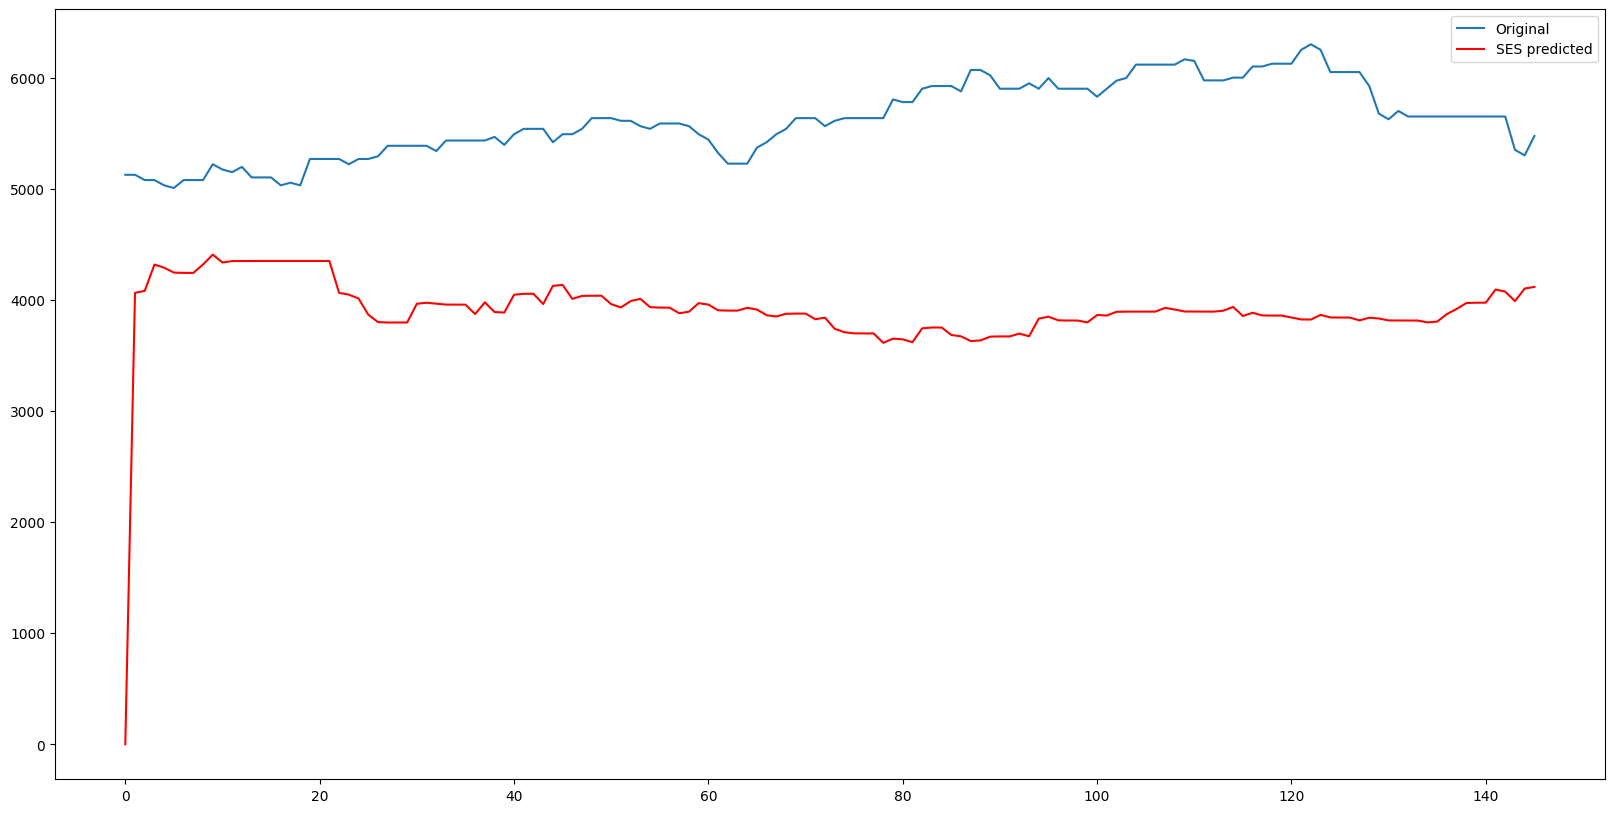

In [ ]:
plt.plot(df_test.BBRI.values, label='Original')
plt.plot(predictions.values, color='red', label='SES predicted')
plt.legend()

### Neural Prophet

In [ ]:
!pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 35.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x

In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training = df_training.rename(
    columns={'BBRI': 'y'})  # old method
prophet_training['ds'] = prophet_training.index
prophet_training.index = pd.RangeIndex(len(prophet_training.index))

prophet_test = df_test.rename(columns={'BBRI': 'y'})  # old method
prophet_test['ds'] = prophet_test.index
prophet_test.index = pd.RangeIndex(len(prophet_test.index))

In [ ]:
data = prophet_training[['ds', 'y']]
data.columns = ['ds', 'y']
data.head()

,ds,y
0,2022-04-18,4063.734
1,2022-04-19,4081.597
2,2022-04-20,4331.673
3,2022-04-21,4287.017
4,2022-04-22,4242.360


In [ ]:
model = NeuralProphet()
model.fit(data, freq='D', epochs=100)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.829% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.829% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_s

Finding best initial lr:   0%|          | 0/220 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,1454.212280,1716.213867,0.544470,0.0,0
1,1271.961304,1523.682617,0.463264,0.0,1
2,1109.041992,1348.849243,0.389446,0.0,2
3,959.768799,1180.116455,0.322683,0.0,3
4,791.854675,1004.836243,0.252097,0.0,4
...,...,...,...,...,...
95,98.262482,122.280983,0.006326,0.0,95
96,99.420303,123.038391,0.006460,0.0,96
97,99.366249,123.801453,0.006517,0.0,97
98,98.934059,122.732666,0.006388,0.0,98


In [ ]:
future = model.make_future_dataframe(data, periods=146)
forecast = model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.829% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.829% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.315% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.315% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.315% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.315% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 19it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_weekly
0,2023-11-25,None,4856.485352,4857.200195,-0.715236
1,2023-11-26,None,4852.931641,4854.117188,-1.185342
2,2023-11-27,None,4842.604492,4851.034180,-8.429372
3,2023-11-28,None,4846.818848,4847.951172,-1.131892
4,2023-11-29,None,4850.631836,4844.867188,5.764362


In [ ]:
forecast.tail()

,ds,y,yhat1,trend,season_weekly
141,2024-04-14,None,4421.278809,4422.464844,-1.185904
142,2024-04-15,None,4410.949219,4419.381348,-8.431863
143,2024-04-16,None,4415.155273,4416.298340,-1.142810
144,2024-04-17,None,4418.976562,4413.214844,5.761700
145,2024-04-18,None,4410.133789,4410.131836,0.001888


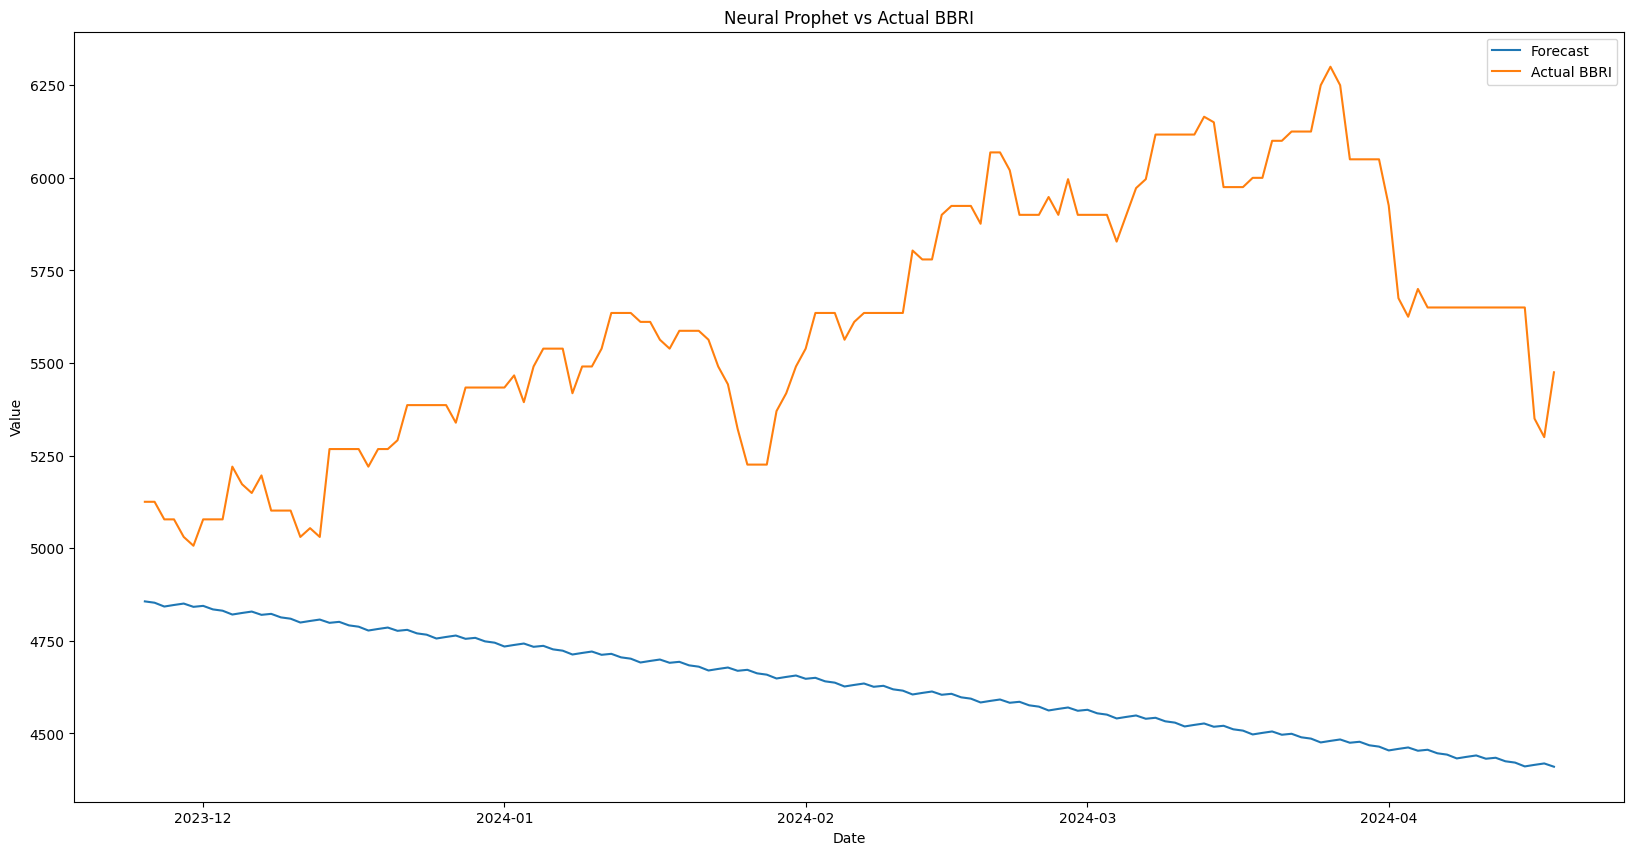

In [ ]:
# Plot prediksi
plt.plot(forecast['ds'], forecast['yhat1'], label='Forecast')

# Plot data aktual dari df_test
plt.plot(df_test.index, df_test['BBRI'], label='Actual BBRI')

# Menambahkan judul dan label sumbu
plt.title('Neural Prophet vs Actual BBRI')
plt.xlabel('Date')
plt.ylabel('Value')

# Menambahkan legenda untuk membedakan kedua garis
plt.legend()

# Menampilkan plot
plt.show()

### Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(data.y, trend='add', seasonal='add', seasonal_periods=20)
fit = model.fit()

In [ ]:
forecast = fit.forecast(steps=146)

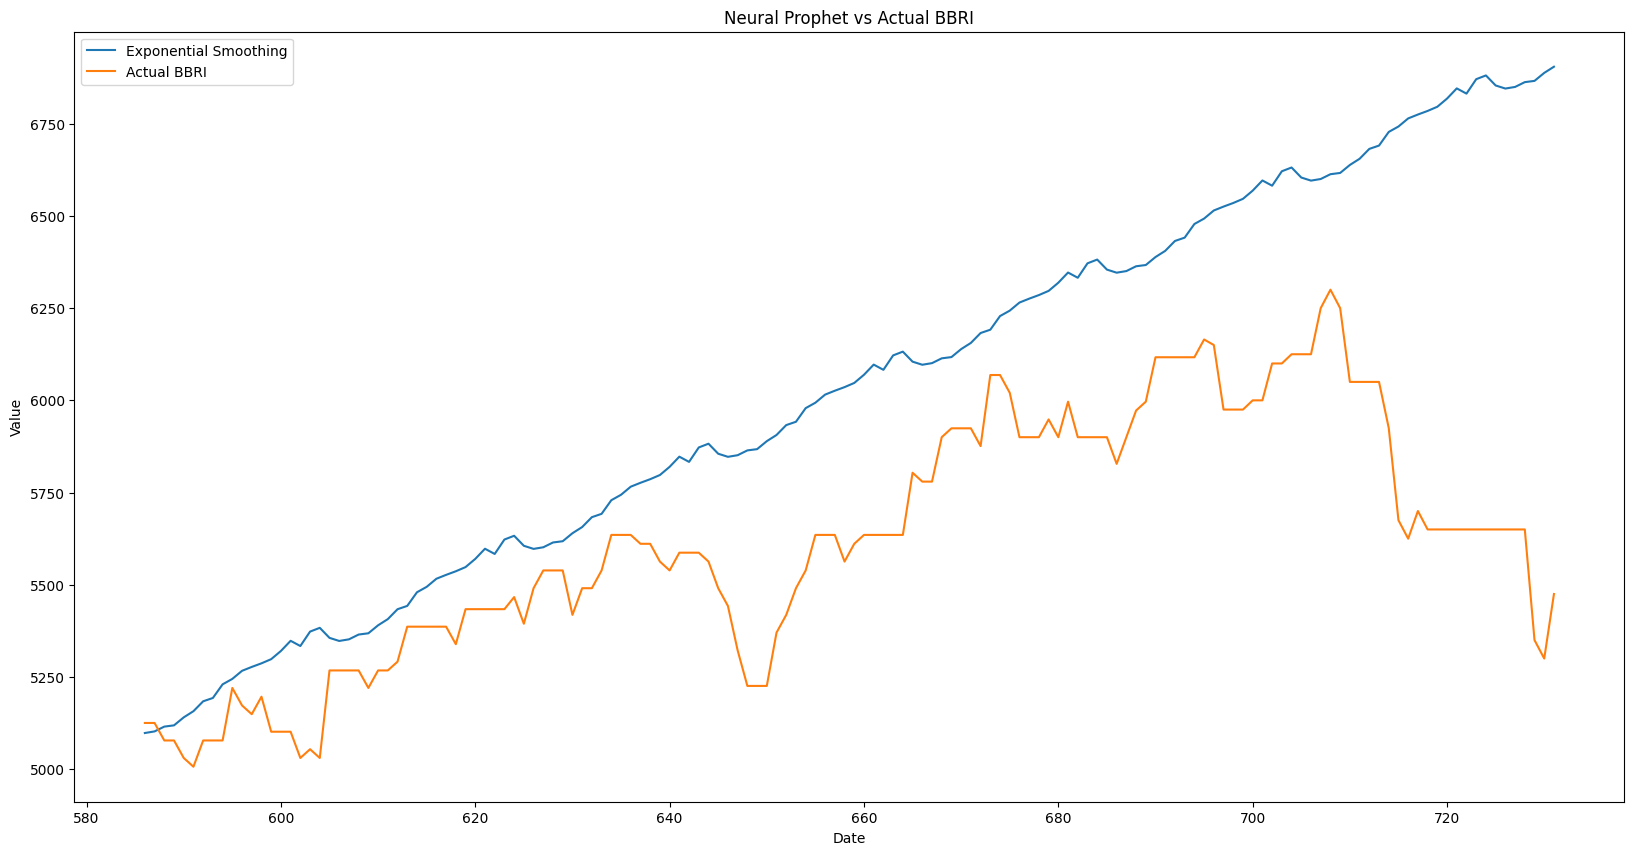

In [ ]:
# Plot prediksi
plt.plot(forecast.index, forecast, label='Exponential Smoothing')

# Plot data aktual dari df_test
plt.plot(forecast.index, df_test['BBRI'], label='Actual BBRI')

# Menambahkan judul dan label sumbu
plt.title('Neural Prophet vs Actual BBRI')
plt.xlabel('Date')
plt.ylabel('Value')

# Menambahkan legenda untuk membedakan kedua garis
plt.legend()

# Menampilkan plot
plt.show()

## BBRI

In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training = df_training.rename(
    columns={'BBRI': 'y'})  # old method
prophet_training['ds'] = prophet_training.index
prophet_training.index = pd.RangeIndex(len(prophet_training.index))

prophet_test = df_test.rename(columns={'BBRI': 'y'})  # old method
prophet_test['ds'] = prophet_test.index
prophet_test.index = pd.RangeIndex(len(prophet_test.index))

In [ ]:
prophet = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=25,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [ ]:
train = prophet
train.fit(prophet_training)
yhat = train.predict(prophet_test)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/iye21v0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/vx9u9psw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38927', 'data', 'file=/tmp/tmpexw2oxmk/iye21v0y.json', 'init=/tmp/tmpexw2oxmk/vx9u9psw.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_modelot3pecxy/prophet_model-20240528104112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


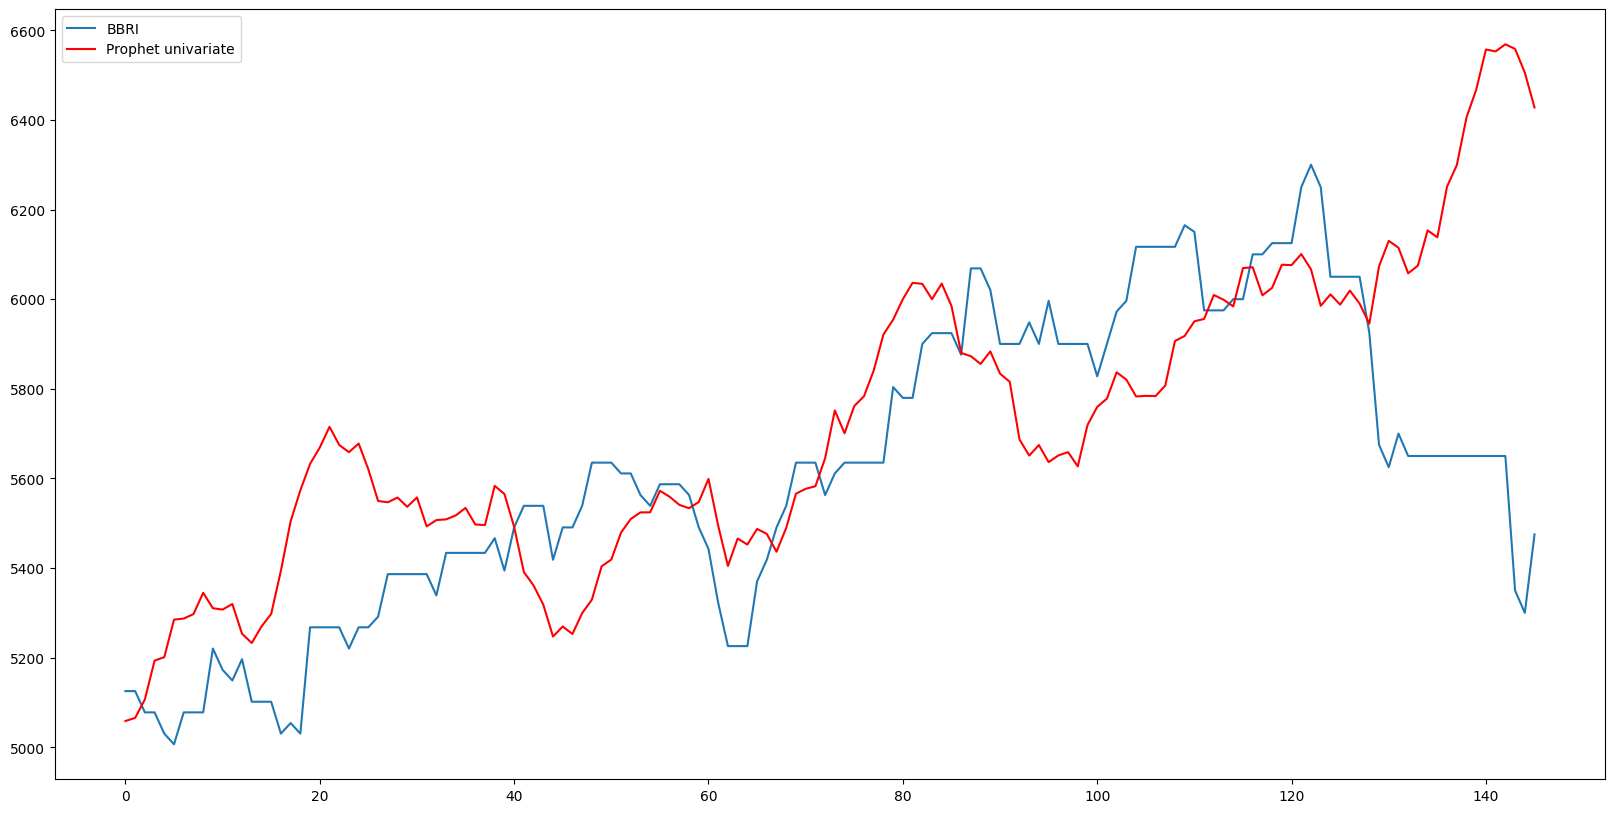

In [ ]:
plt.plot(df_test.BBRI.values, label='BBRI')
plt.plot(yhat.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.BBRI.array, yhat.yhat.array)
mape = mean_absolute_percentage_error(df_test.BBRI.array, yhat.yhat.array)
mse = mean_squared_error(df_test.BBRI.array, yhat.yhat.array)
rmse = sqrt(mean_squared_error(df_test.BBRI.array, yhat.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 226.95145462482614
Mean Absolute Percentage Error 0.04085971109841521
mean_squared_error 101736.11763909365
root_mean_squared_error 318.9609970499428


## BBTN

In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training1 = df_training.rename(
    columns={'BBTN': 'y'})  # old method
prophet_training1['ds'] = prophet_training1.index
prophet_training1.index = pd.RangeIndex(len(prophet_training1.index))

prophet_test1 = df_test.rename(columns={'BBTN': 'y'})  # old method
prophet_test1['ds'] = prophet_test1.index
prophet_test1.index = pd.RangeIndex(len(prophet_test1.index))

In [ ]:
prophet1 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [ ]:
prophet1.fit(prophet_training1)
yhat1 = prophet1.predict(prophet_test1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/ysna37zp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/k9lojaq4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90015', 'data', 'file=/tmp/tmpexw2oxmk/ysna37zp.json', 'init=/tmp/tmpexw2oxmk/k9lojaq4.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_model62h1mv8o/prophet_model-20240528104119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


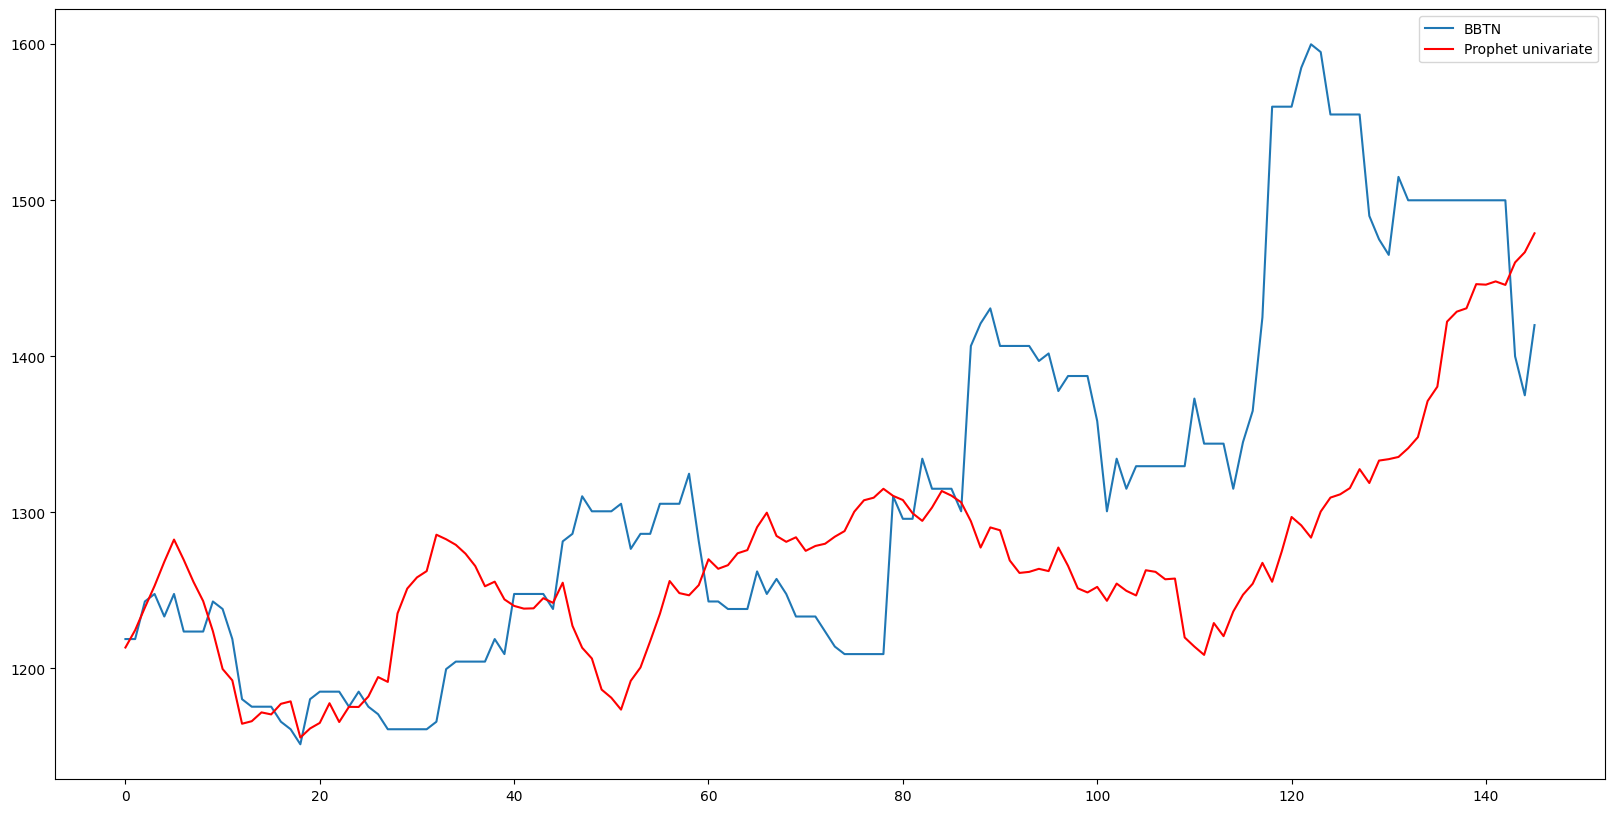

In [ ]:
plt.plot(df_test.BBTN.values, label='BBTN')
plt.plot(yhat1.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.BBTN.array, yhat1.yhat.array)
mape1 = mean_absolute_percentage_error(df_test.BBTN.array, yhat1.yhat.array)
mse = mean_squared_error(df_test.BBTN.array, yhat1.yhat.array)
rmse = sqrt(mean_squared_error(df_test.BBTN.array, yhat1.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape1)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 80.01642860607652
Mean Absolute Percentage Error 0.057939729521219084
mean_squared_error 11260.067009302582
root_mean_squared_error 106.11346290317069


## BMRI

In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training2 = df_training.rename(
    columns={'BMRI': 'y'})  # old method
prophet_training2['ds'] = prophet_training2.index
prophet_training2.index = pd.RangeIndex(len(prophet_training2.index))

prophet_test2 = df_test.rename(columns={'BMRI': 'y'})  # old method
prophet_test2['ds'] = prophet_test2.index
prophet_test2.index = pd.RangeIndex(len(prophet_test2.index))

In [ ]:
prophet2 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [ ]:
prophet2.fit(prophet_training2)
yhat2 = prophet2.predict(prophet_test2)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/o_a6wy9o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/e5zk02s4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39474', 'data', 'file=/tmp/tmpexw2oxmk/o_a6wy9o.json', 'init=/tmp/tmpexw2oxmk/e5zk02s4.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_modellr729s2z/prophet_model-20240528104125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


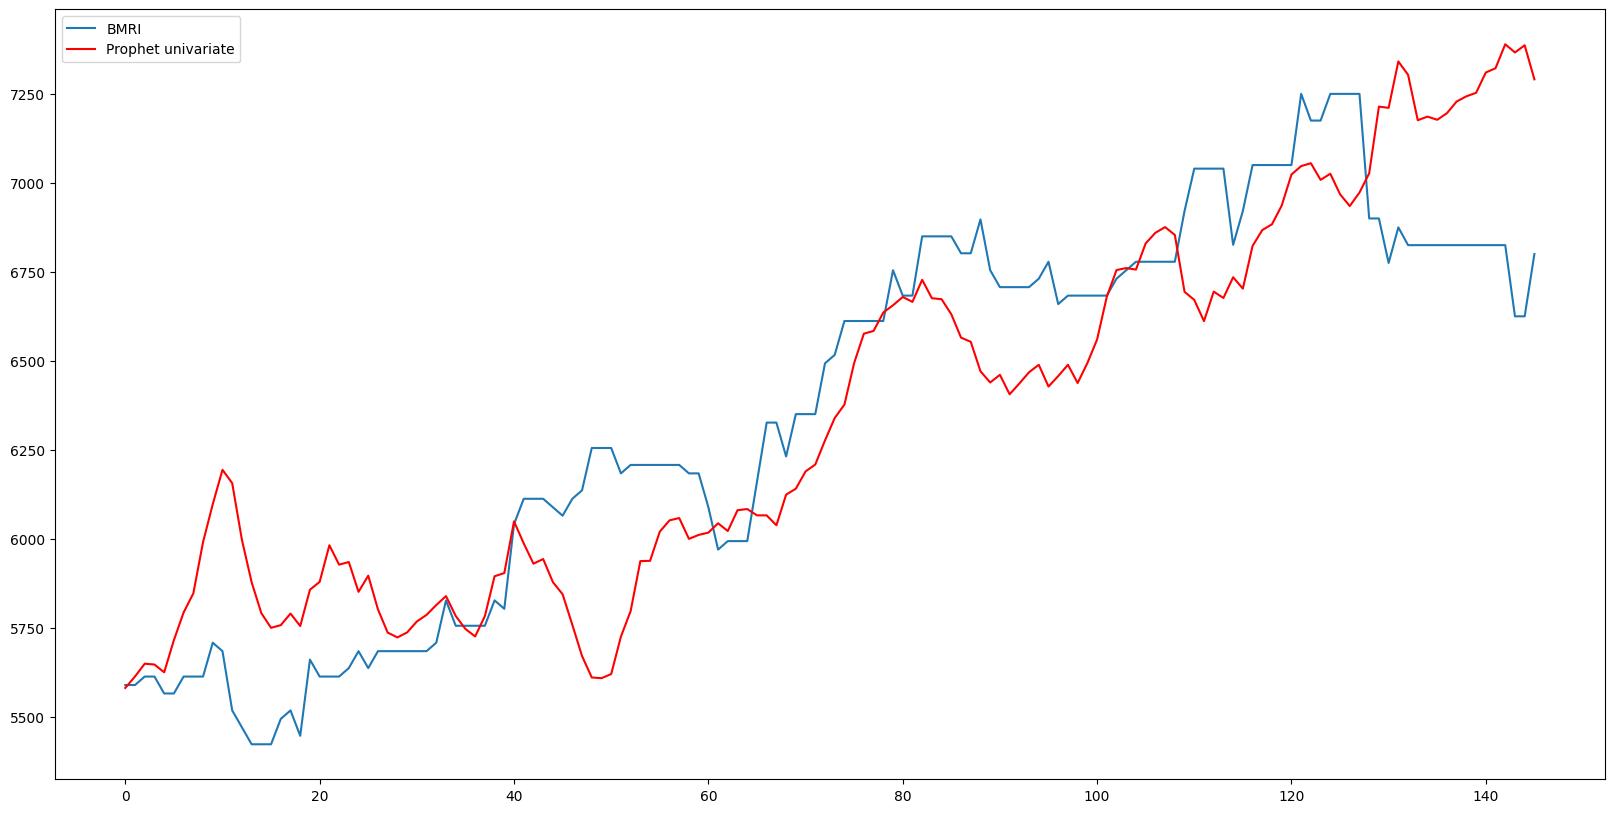

In [ ]:
plt.plot(df_test.BMRI.values, label='BMRI')
plt.plot(yhat2.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.BMRI.array, yhat2.yhat.array)
mape2 = mean_absolute_percentage_error(df_test.BMRI.array, yhat2.yhat.array)
mse = mean_squared_error(df_test.BMRI.array, yhat2.yhat.array)
rmse = sqrt(mean_squared_error(df_test.BMRI.array, yhat2.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape2)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 230.2908607837181
Mean Absolute Percentage Error 0.0362255850318982
mean_squared_error 81244.4664406915
root_mean_squared_error 285.03414960437897


## NISP

In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training3 = df_training.rename(
    columns={'NISP': 'y'})  # old method
prophet_training3['ds'] = prophet_training3.index
prophet_training3.index = pd.RangeIndex(len(prophet_training3.index))

prophet_test3 = df_test.rename(columns={'NISP': 'y'})  # old method
prophet_test3['ds'] = prophet_test3.index
prophet_test3.index = pd.RangeIndex(len(prophet_test3.index))

In [ ]:
prophet3 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=20
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=10
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=40
)

In [ ]:
prophet3.fit(prophet_training3)
yhat3 = prophet3.predict(prophet_test3)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/23oogknx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/w3tbf61z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87328', 'data', 'file=/tmp/tmpexw2oxmk/23oogknx.json', 'init=/tmp/tmpexw2oxmk/w3tbf61z.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_model0tbqw79q/prophet_model-20240528104129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


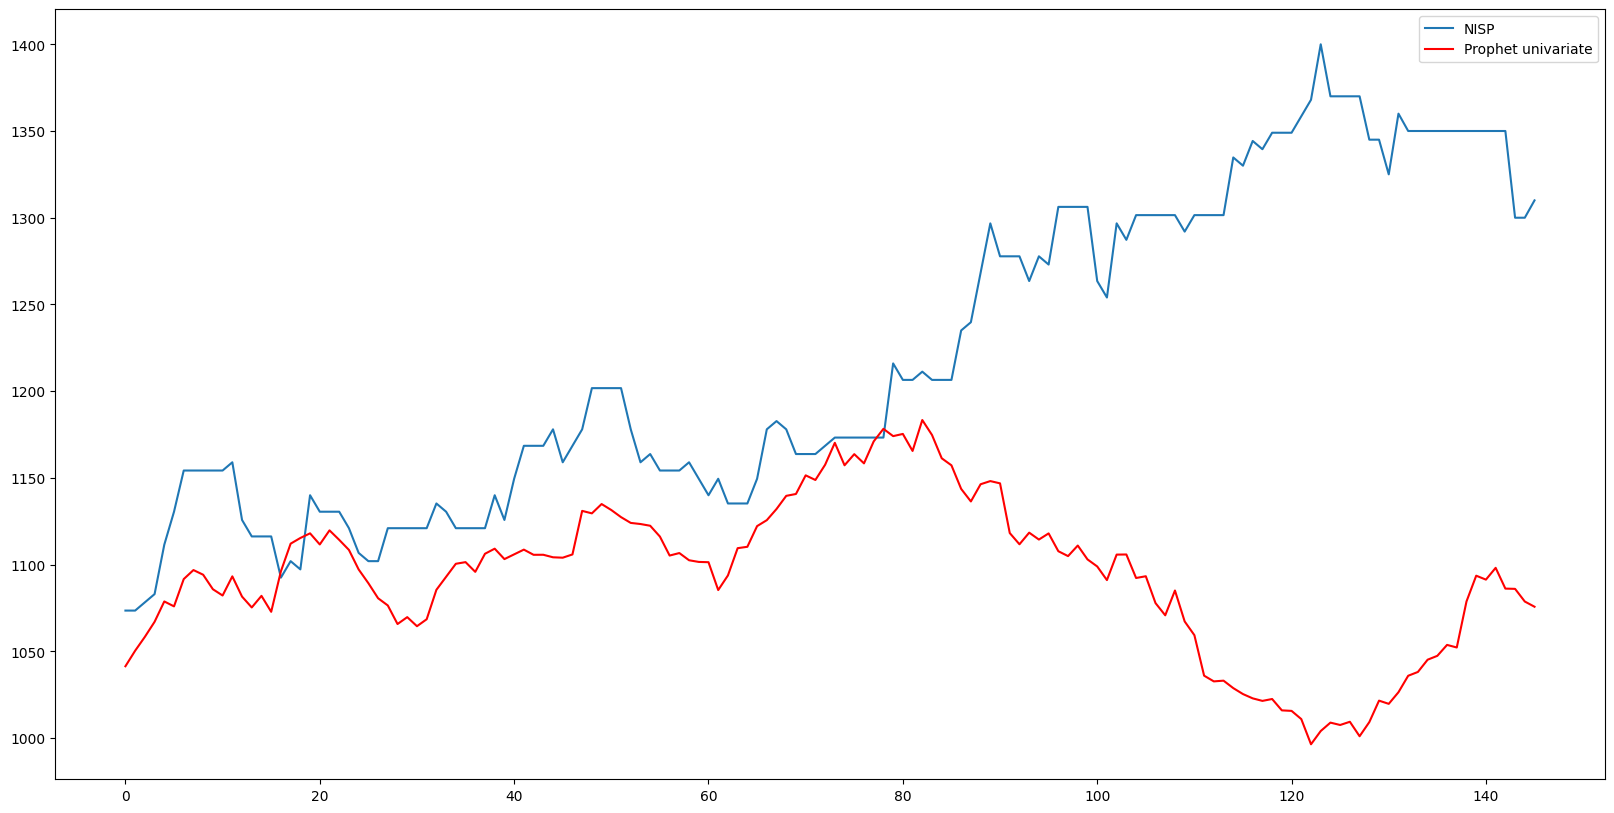

In [ ]:
plt.plot(df_test.NISP.values, label='NISP')
plt.plot(yhat3.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.NISP.array, yhat3.yhat.array)
mape3 = mean_absolute_percentage_error(df_test.NISP.array, yhat3.yhat.array)
mse = mean_squared_error(df_test.NISP.array, yhat3.yhat.array)
rmse = sqrt(mean_squared_error(df_test.NISP.array, yhat3.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape3)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 125.87958876654845
Mean Absolute Percentage Error 0.09725060304175115
mean_squared_error 29638.560721570535
root_mean_squared_error 172.15853368790795


## BBNI

In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training4 = df_training.rename(
    columns={'BBNI': 'y'})  # old method
prophet_training4['ds'] = prophet_training4.index
prophet_training4.index = pd.RangeIndex(len(prophet_training4.index))

prophet_test4 = df_test.rename(columns={'BBNI': 'y'})  # old method
prophet_test4['ds'] = prophet_test4.index
prophet_test4.index = pd.RangeIndex(len(prophet_test4.index))

In [ ]:
prophet4 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=20
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=35
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [ ]:
prophet4.fit(prophet_training4)
yhat4 = prophet4.predict(prophet_test4)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/h5r7zyfj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/xuygf0xh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19458', 'data', 'file=/tmp/tmpexw2oxmk/h5r7zyfj.json', 'init=/tmp/tmpexw2oxmk/xuygf0xh.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_modeleqdh9nqw/prophet_model-20240528104132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


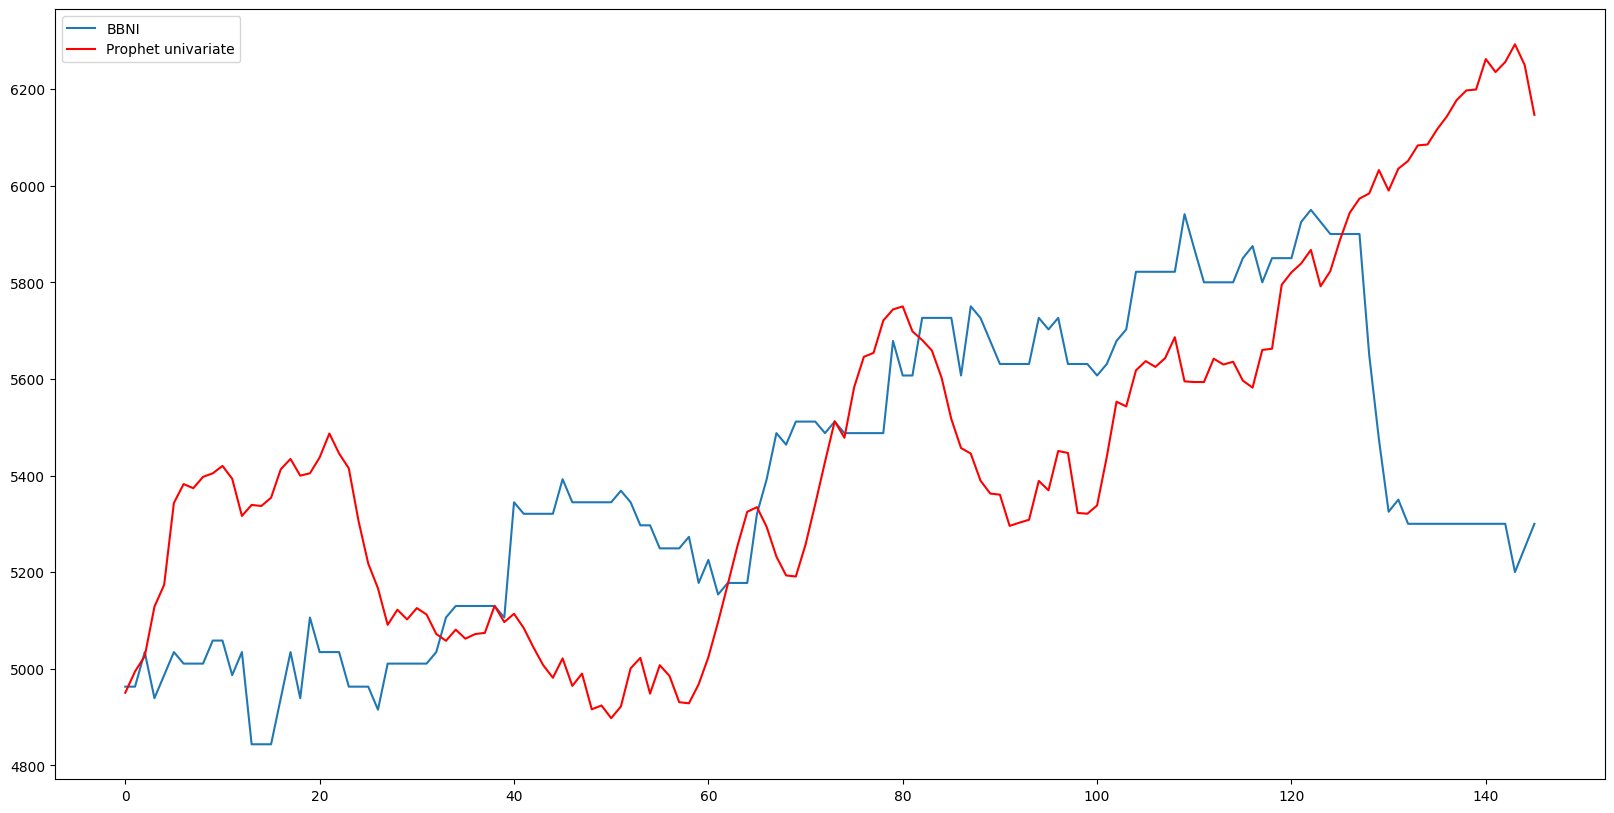

In [ ]:
plt.plot(df_test.BBNI.values, label='BBNI')
plt.plot(yhat4.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.BBNI.array, yhat4.yhat.array)
mape4 = mean_absolute_percentage_error(df_test.BBNI.array, yhat4.yhat.array)
mse = mean_squared_error(df_test.BBNI.array, yhat4.yhat.array)
rmse = sqrt(mean_squared_error(df_test.BBNI.array, yhat4.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape4)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 294.17429817873943
Mean Absolute Percentage Error 0.05525801373380533
mean_squared_error 144800.92731684263
root_mean_squared_error 380.52717027413775


## BBCA

In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training5 = df_training.rename(
    columns={'BBCA': 'y'})  # old method
prophet_training5['ds'] = prophet_training5.index
prophet_training5.index = pd.RangeIndex(len(prophet_training5.index))

prophet_test5 = df_test.rename(columns={'BBCA': 'y'})  # old method
prophet_test5['ds'] = prophet_test5.index
prophet_test5.index = pd.RangeIndex(len(prophet_test5.index))

In [ ]:
prophet5 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=15
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=35
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=40
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [ ]:
prophet5.fit(prophet_training5)
yhat5 = prophet5.predict(prophet_test5)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/z1ohv7q6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/istuo9pd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40336', 'data', 'file=/tmp/tmpexw2oxmk/z1ohv7q6.json', 'init=/tmp/tmpexw2oxmk/istuo9pd.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_model2j7f_es3/prophet_model-20240528104138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


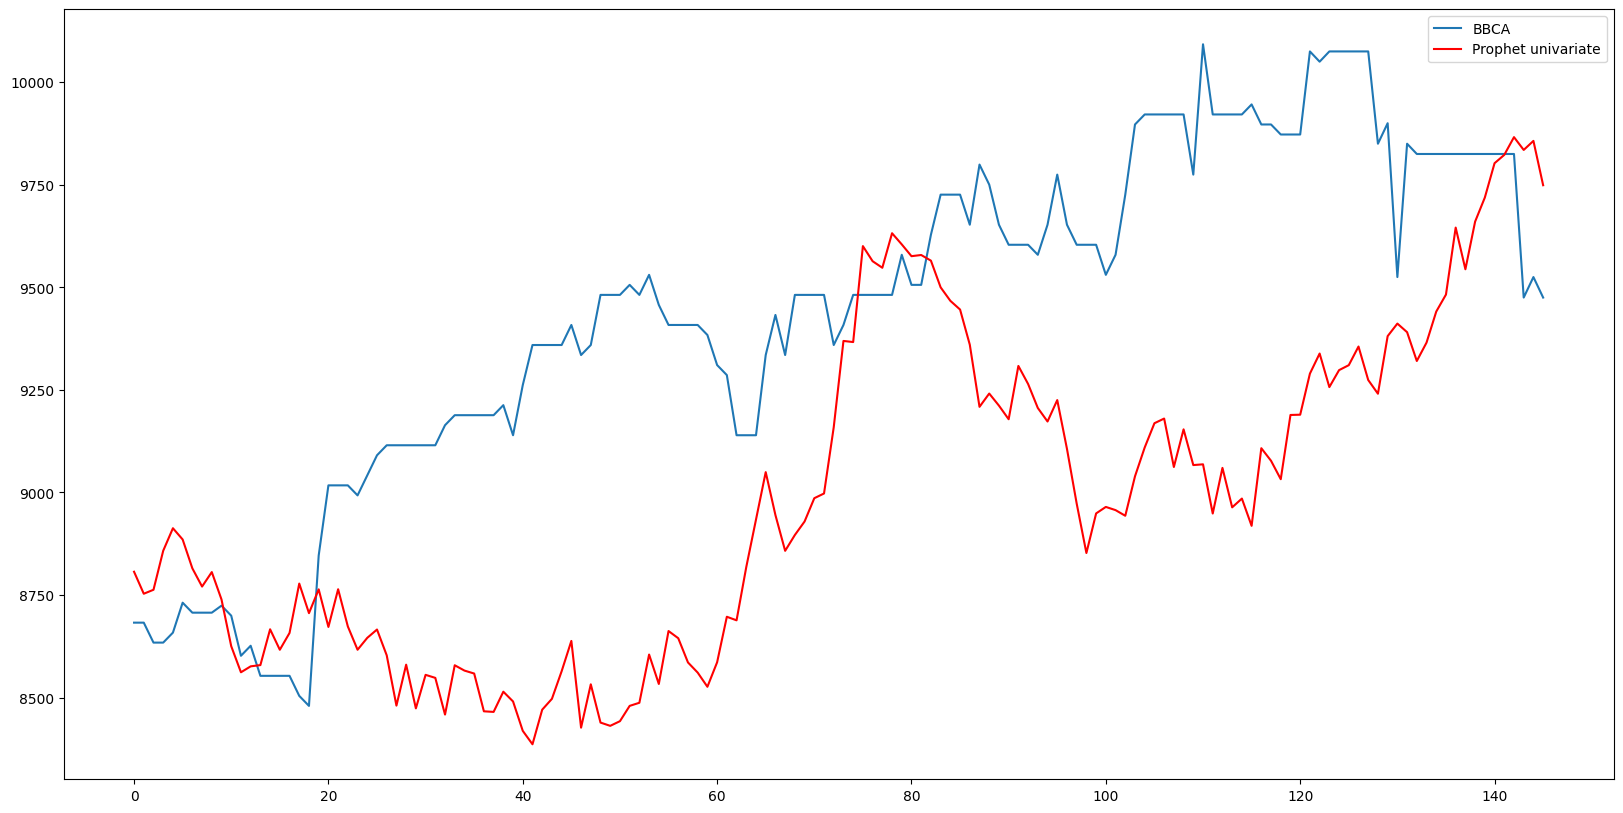

In [ ]:
plt.plot(df_test.BBCA.values, label='BBCA')
plt.plot(yhat5.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.BBCA.array, yhat5.yhat.array)
mape5 = mean_absolute_percentage_error(df_test.BBCA.array, yhat5.yhat.array)
mse = mean_squared_error(df_test.BBCA.array, yhat5.yhat.array)
rmse = sqrt(mean_squared_error(df_test.BBCA.array, yhat5.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape5)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 500.4044888953341
Mean Absolute Percentage Error 0.05245387827353719
mean_squared_error 343858.93632424664
root_mean_squared_error 586.3948638283308


## BANK

In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training6 = df_training.rename(
    columns={'BANK': 'y'})  # old method
prophet_training6['ds'] = prophet_training6.index
prophet_training6.index = pd.RangeIndex(len(prophet_training6.index))

prophet_test6 = df_test.rename(columns={'BANK': 'y'})  # old method
prophet_test6['ds'] = prophet_test6.index
prophet_test6.index = pd.RangeIndex(len(prophet_test6.index))

In [ ]:
prophet6 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=35
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=40
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [ ]:
prophet6.fit(prophet_training6)
yhat6 = prophet6.predict(prophet_test6)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/2ivquops.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/or3w4yb4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43172', 'data', 'file=/tmp/tmpexw2oxmk/2ivquops.json', 'init=/tmp/tmpexw2oxmk/or3w4yb4.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_modelxtn6mdm1/prophet_model-20240528104143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


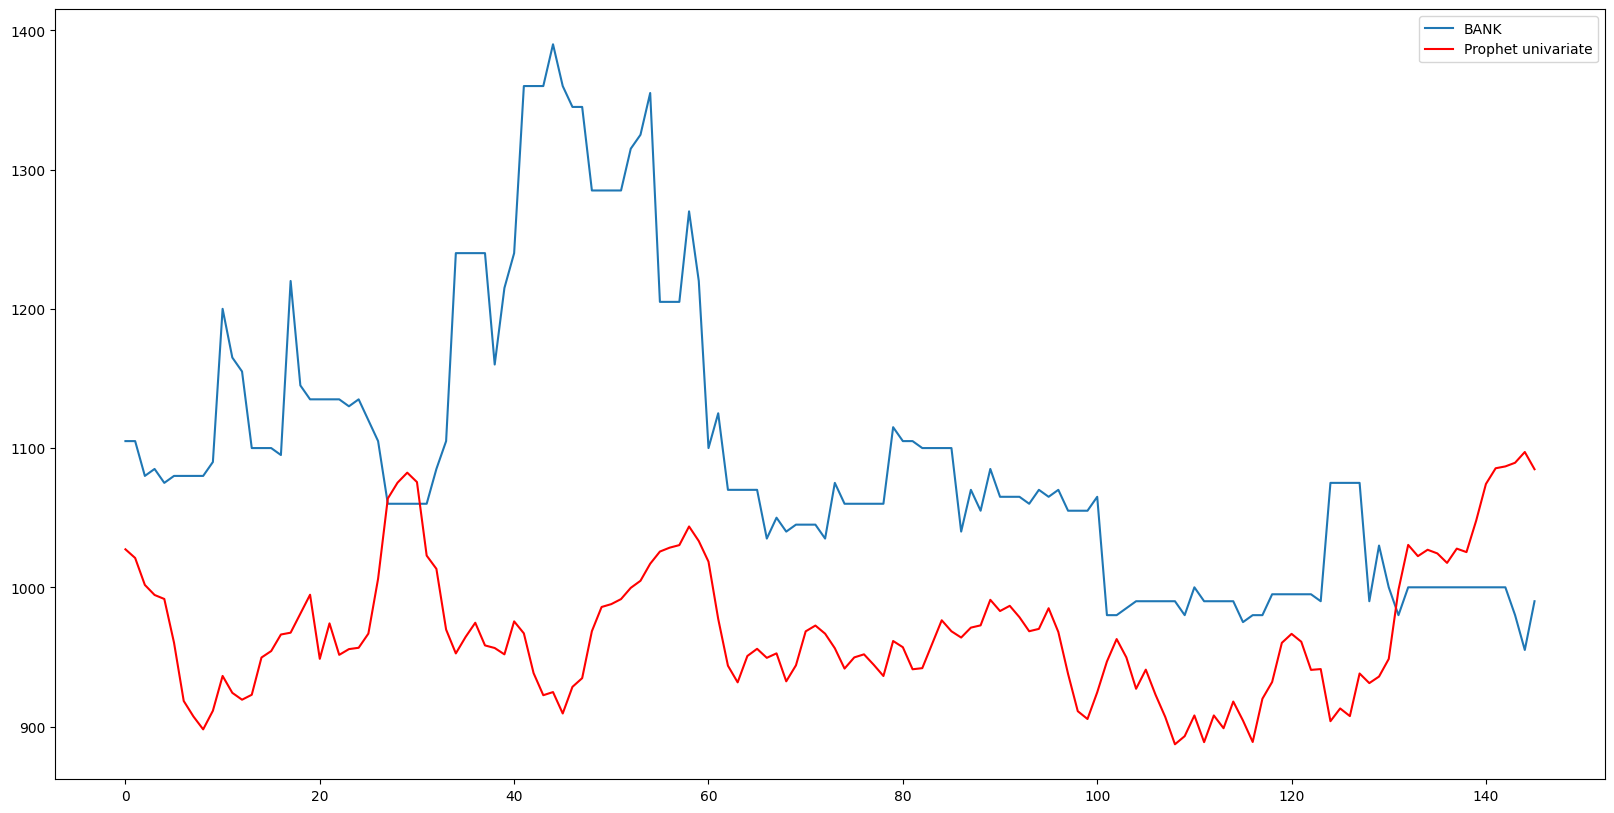

In [ ]:
plt.plot(df_test.BANK.values, label='BANK')
plt.plot(yhat6.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.BANK.array, yhat6.yhat.array)
mape6 = mean_absolute_percentage_error(df_test.BANK.array, yhat6.yhat.array)
mse = mean_squared_error(df_test.BANK.array, yhat6.yhat.array)
rmse = sqrt(mean_squared_error(df_test.BANK.array, yhat6.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape6)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 138.60495304315938
Mean Absolute Percentage Error 0.1205231342097867
mean_squared_error 29020.368254458397
root_mean_squared_error 170.35365641646322


## MEGA

In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training7 = df_training.rename(
    columns={'MEGA': 'y'})  # old method
prophet_training7['ds'] = prophet_training7.index
prophet_training7.index = pd.RangeIndex(len(prophet_training7.index))

prophet_test7 = df_test.rename(columns={'MEGA': 'y'})  # old method
prophet_test7['ds'] = prophet_test7.index
prophet_test7.index = pd.RangeIndex(len(prophet_test7.index))

In [ ]:
prophet7 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=15
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [ ]:
prophet7.fit(prophet_training7)
yhat7 = prophet7.predict(prophet_test7)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/y_px9_ms.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/142y5r3o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31873', 'data', 'file=/tmp/tmpexw2oxmk/y_px9_ms.json', 'init=/tmp/tmpexw2oxmk/142y5r3o.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_modeldnb6gzjm/prophet_model-20240528104147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


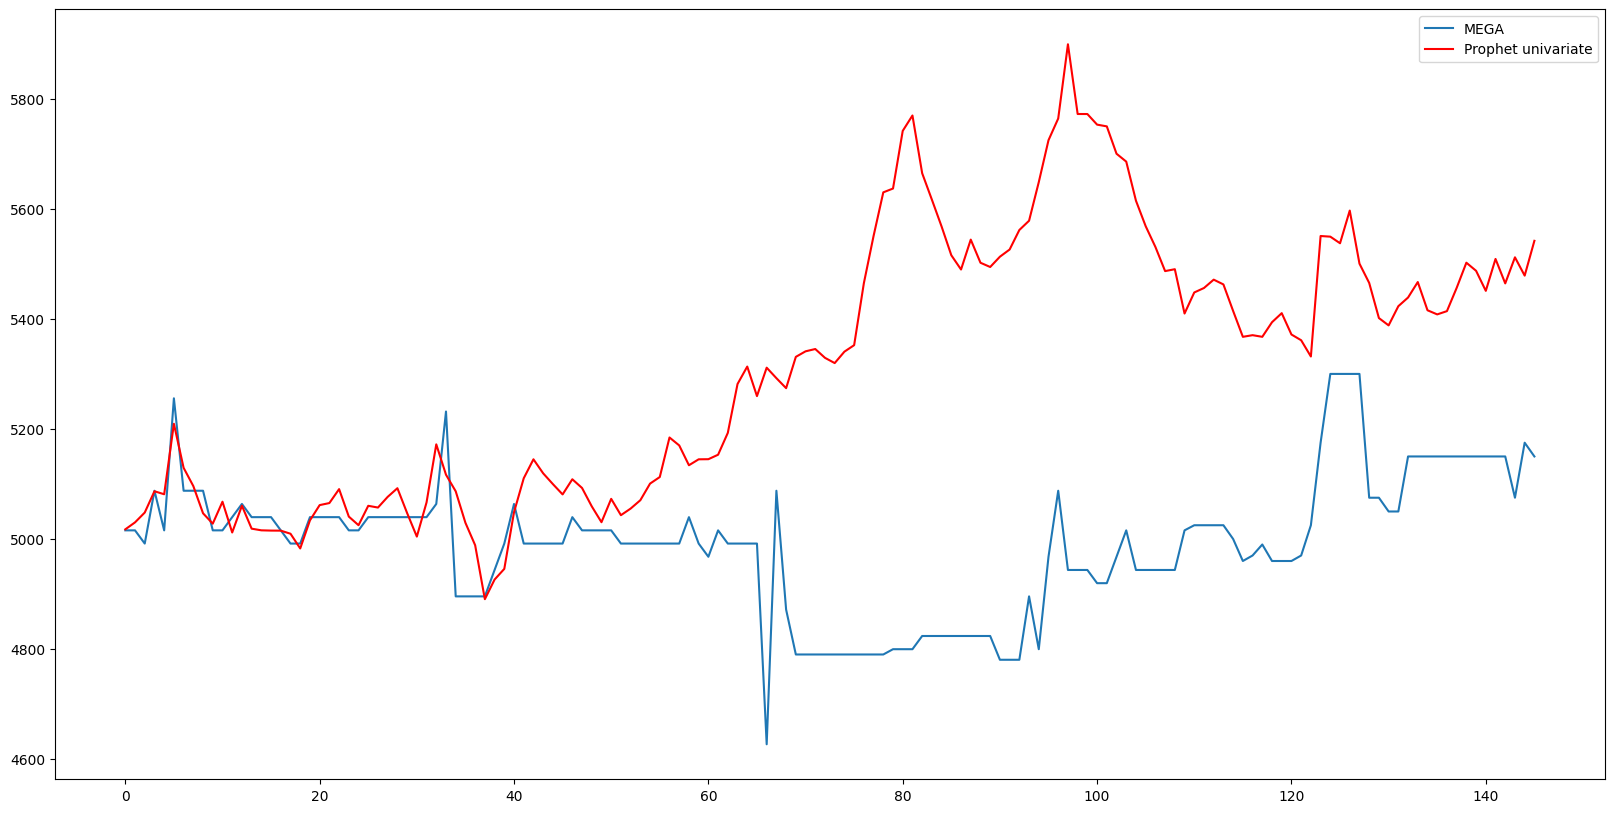

In [ ]:
plt.plot(df_test.MEGA.values, label='MEGA')
plt.plot(yhat7.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.MEGA.array, yhat7.yhat.array)
mape7 = mean_absolute_percentage_error(df_test.MEGA.array, yhat7.yhat.array)
mse = mean_squared_error(df_test.MEGA.array, yhat7.yhat.array)
rmse = sqrt(mean_squared_error(df_test.MEGA.array, yhat7.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape7)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 326.44276628361297
Mean Absolute Percentage Error 0.06623521447513533
mean_squared_error 185404.76324455847
root_mean_squared_error 430.58653397959216


## BRIS

In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training8 = df_training.rename(
    columns={'BRIS': 'y'})  # old method
prophet_training8['ds'] = prophet_training8.index
prophet_training8.index = pd.RangeIndex(len(prophet_training8.index))

prophet_test8 = df_test.rename(columns={'BRIS': 'y'})  # old method
prophet_test8['ds'] = prophet_test8.index
prophet_test8.index = pd.RangeIndex(len(prophet_test8.index))

In [ ]:
prophet8 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=35
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [ ]:
prophet8.fit(prophet_training8)
yhat8 = prophet8.predict(prophet_test8)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/hginshzh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/3m1_dp3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95948', 'data', 'file=/tmp/tmpexw2oxmk/hginshzh.json', 'init=/tmp/tmpexw2oxmk/3m1_dp3b.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_modeldfeptb5g/prophet_model-20240528104153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


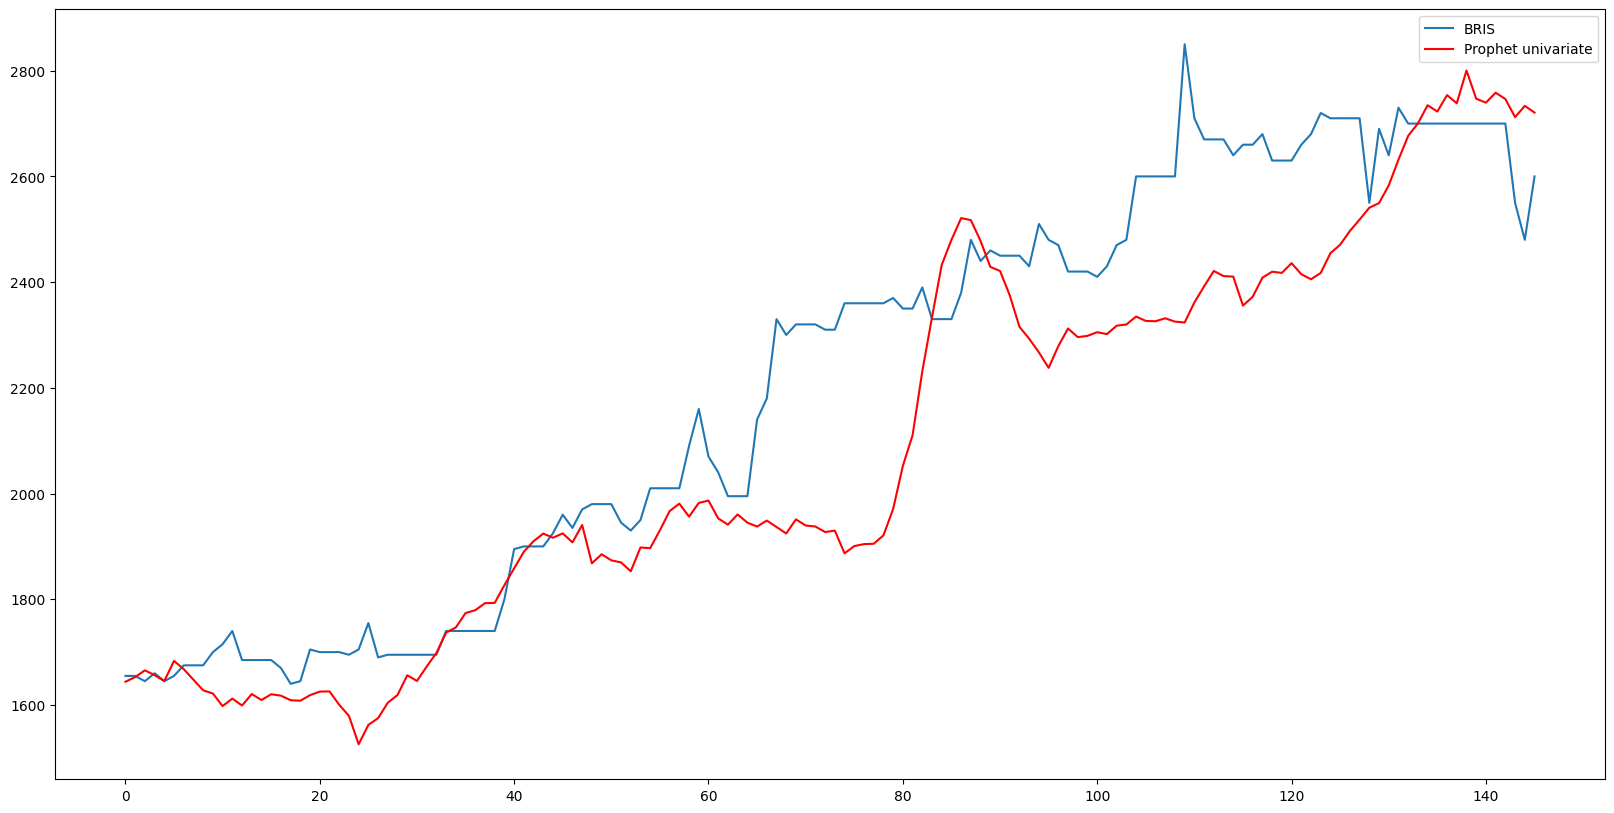

In [ ]:
plt.plot(df_test.BRIS.values, label='BRIS')
plt.plot(yhat8.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.BRIS.array, yhat8.yhat.array)
mape8 = mean_absolute_percentage_error(df_test.BRIS.array, yhat8.yhat.array)
mse = mean_squared_error(df_test.BRIS.array, yhat8.yhat.array)
rmse = sqrt(mean_squared_error(df_test.BRIS.array, yhat8.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape8)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 140.98967731156029
Mean Absolute Percentage Error 0.060585045234565274
mean_squared_error 35715.300926520205
root_mean_squared_error 188.98492248462628


## ARTO

In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training9 = df_training.rename(
    columns={'ARTO': 'y'})  # old method
prophet_training9['ds'] = prophet_training9.index
prophet_training9.index = pd.RangeIndex(len(prophet_training9.index))

prophet_test9 = df_test.rename(columns={'ARTO': 'y'})  # old method
prophet_test9['ds'] = prophet_test9.index
prophet_test9.index = pd.RangeIndex(len(prophet_test9.index))

In [ ]:
prophet9 = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=40
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [ ]:
prophet9.fit(prophet_training9)
yhat9 = prophet9.predict(prophet_test9)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/egh1g_u4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/91msloot.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10831', 'data', 'file=/tmp/tmpexw2oxmk/egh1g_u4.json', 'init=/tmp/tmpexw2oxmk/91msloot.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_model39_kv53a/prophet_model-20240528104156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


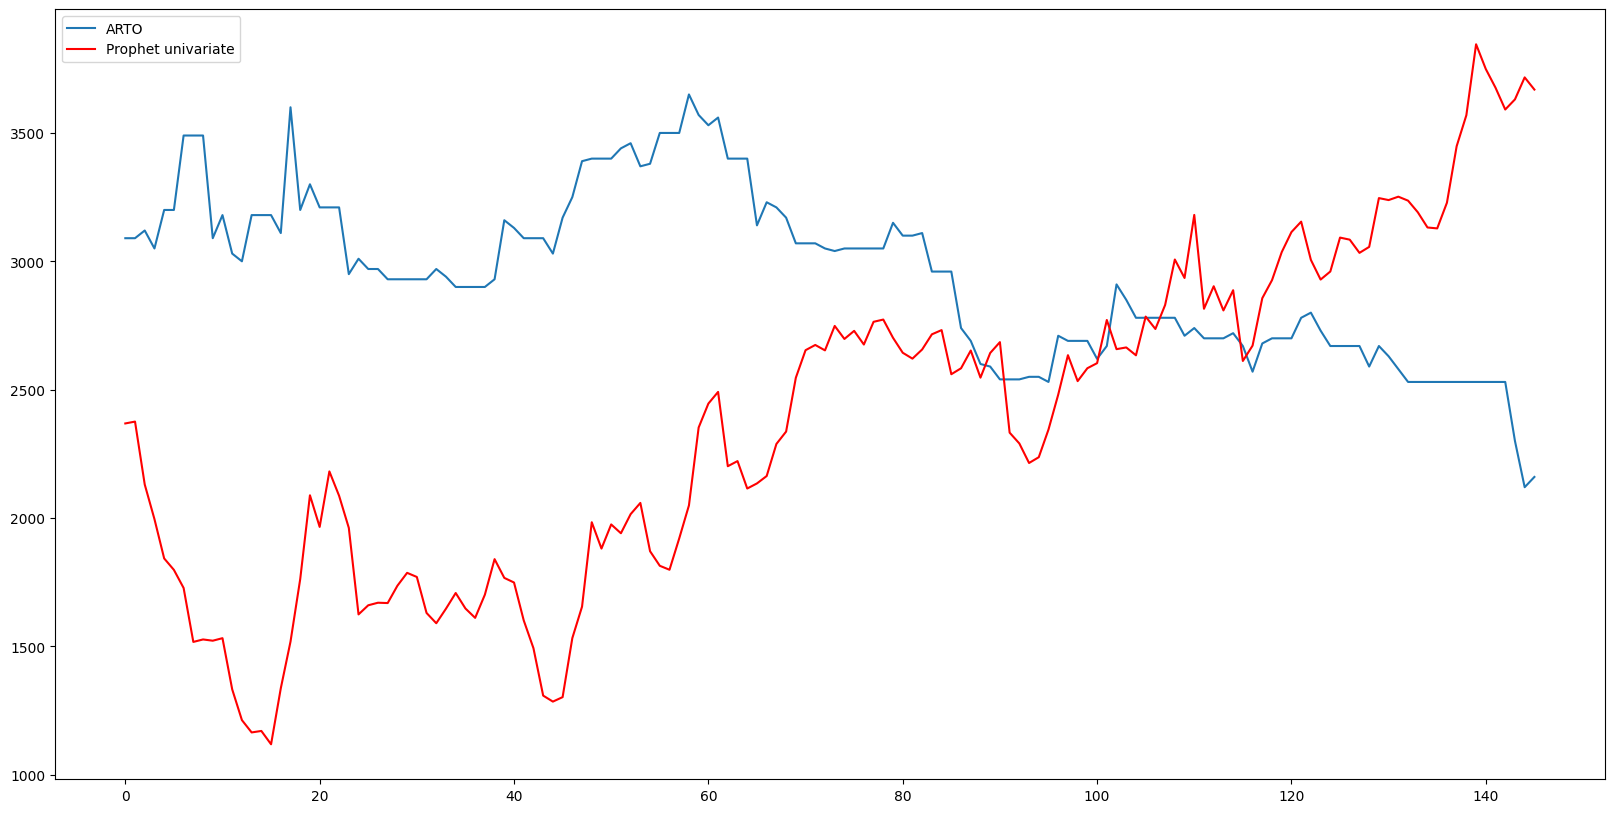

In [ ]:
plt.plot(df_test.ARTO.values, label='ARTO')
plt.plot(yhat9.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.ARTO.array, yhat9.yhat.array)
mape9 = mean_absolute_percentage_error(df_test.ARTO.array, yhat9.yhat.array)
mse = mean_squared_error(df_test.ARTO.array, yhat9.yhat.array)
rmse = sqrt(mean_squared_error(df_test.ARTO.array, yhat9.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape9)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 875.635642547953
Mean Absolute Percentage Error 0.28866362453595795
mean_squared_error 1129240.1427090757
root_mean_squared_error 1062.6571143643068


## BBYB

In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training10 = df_training.rename(
    columns={'BBYB': 'y'})  # old method
prophet_training10['ds'] = prophet_training10.index
prophet_training10.index = pd.RangeIndex(len(prophet_training10.index))

prophet_test10 = df_test.rename(columns={'BBYB': 'y'})  # old method
prophet_test10['ds'] = prophet_test10.index
prophet_test10.index = pd.RangeIndex(len(prophet_test10.index))

In [ ]:
prophet10 = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=15
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=55
)

In [ ]:
prophet10.fit(prophet_training10)
yhat10 = prophet10.predict(prophet_test10)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/edaukaso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/ounc78v8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60789', 'data', 'file=/tmp/tmpexw2oxmk/edaukaso.json', 'init=/tmp/tmpexw2oxmk/ounc78v8.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_modelz65z17tt/prophet_model-20240528104159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:42:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


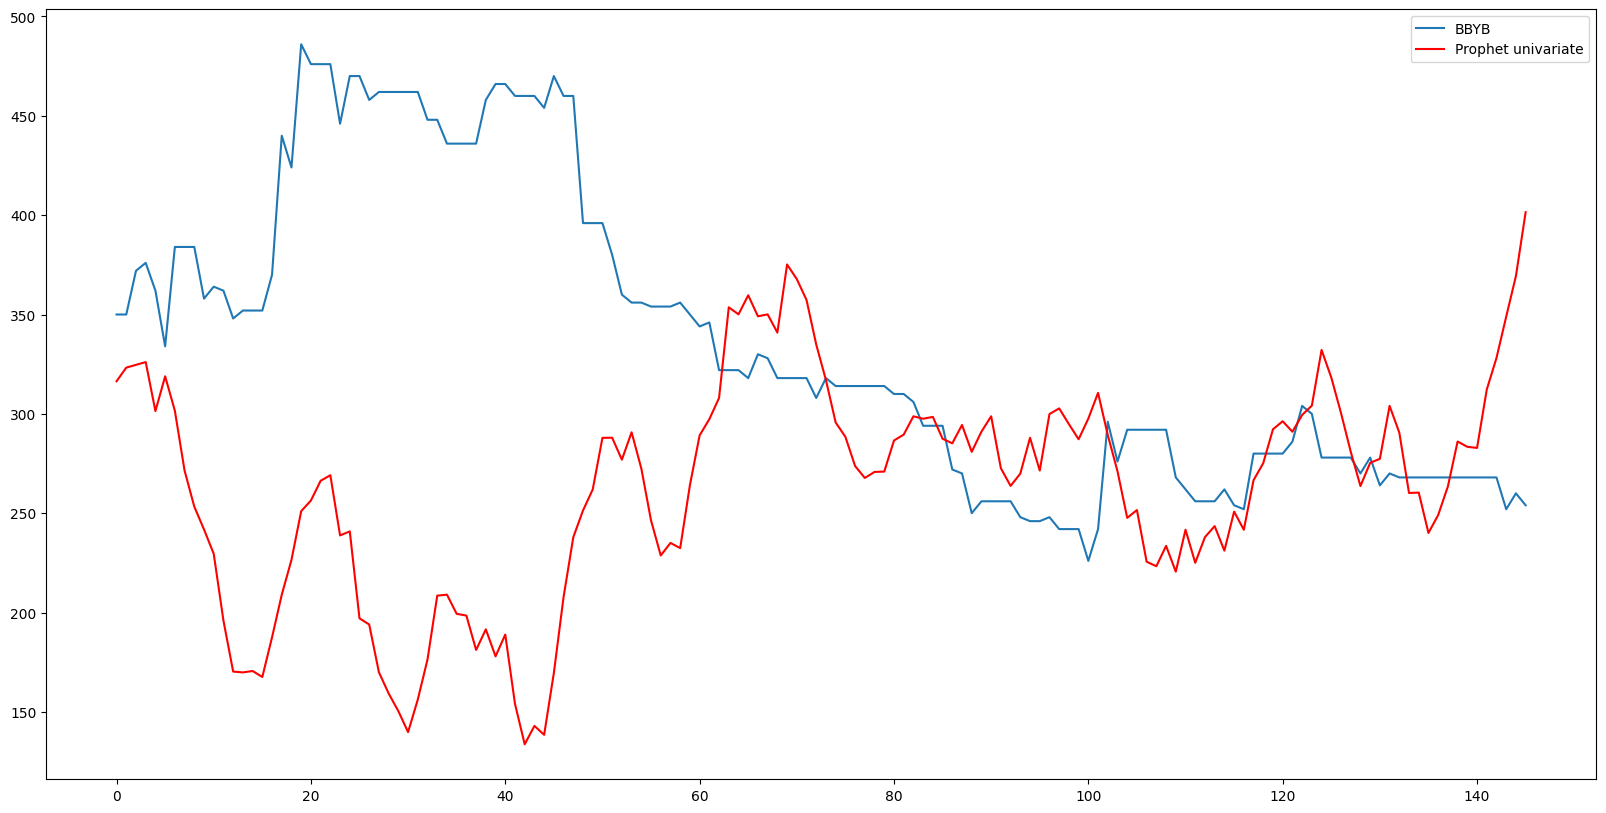

In [ ]:
plt.plot(df_test.BBYB.values, label='BBYB')
plt.plot(yhat10.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.BBYB.array, yhat10.yhat.array)
mape10 = mean_absolute_percentage_error(df_test.BBYB.array, yhat10.yhat.array)
mse = mean_squared_error(df_test.BBYB.array, yhat10.yhat.array)
rmse = sqrt(mean_squared_error(df_test.BBYB.array, yhat10.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape10)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 95.53164559848304
Mean Absolute Percentage Error 0.2470075543329006
mean_squared_error 18745.820993179743
root_mean_squared_error 136.91537895057567


## BNGA

## Searching Best Fourier Order Parameters

In [ ]:
from itertools import product
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error

# Define the range of Fourier orders for each seasonality component
monthly_fourier_orders = [5, 10, 15]
daily_fourier_orders = [10, 15, 20]
weekly_fourier_orders = [30, 35, 40]
yearly_fourier_orders = [30, 40, 50]
quarterly_fourier_orders = [50, 55, 60]

# Generate all combinations of Fourier orders
combinations = list(product(monthly_fourier_orders, daily_fourier_orders, weekly_fourier_orders, yearly_fourier_orders, quarterly_fourier_orders))

# Initialize results dictionary
resultsDict = {}

# Iterate over each combination and fit the model
for i, combo in enumerate(combinations, 1):
    monthly, daily, weekly, yearly, quarterly = combo
    prophet = Prophet(
        growth='linear',
        seasonality_mode='additive',
        holidays_prior_scale=20,
        daily_seasonality=False,
        weekly_seasonality=False,
        yearly_seasonality=False
    ).add_seasonality(
        name='monthly',
        period=30.5,
        fourier_order=monthly
    ).add_seasonality(
        name='daily',
        period=1,
        fourier_order=daily
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=weekly
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=yearly
    ).add_seasonality(
        name='quarterly',
        period=365.25/4,
        fourier_order=quarterly
    )

    # Fit the model
    prophet.fit(prophet_training22)

    # Make predictions
    yhat = prophet.predict(prophet_test22)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(prophet_test22['y'], yhat['yhat'])

    # Store the results
    combo_name = f'monthly_{monthly}_daily_{daily}_weekly_{weekly}_yearly_{yearly}_quarterly_{quarterly}'
    resultsDict[combo_name] = mape

    # Print the results
    print(f"Iteration {i}: Combination: {combo_name} - MAPE: {mape:.5f}")

# Find the combination with the smallest MAPE
best_combo = min(resultsDict, key=resultsDict.get)
best_mape = resultsDict[best_combo]

# Print all results at the end
print("\nAll combinations and their MAPE values:")
for combo_name, mape in resultsDict.items():
    print(f"{combo_name}: {mape:.5f}")

# Print the best combination
print(f"\nBest combination: {best_combo} - MAPE: {best_mape:.5f}")


In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training11 = df_training.rename(
    columns={'BNGA': 'y'})  # old method
prophet_training11['ds'] = prophet_training11.index
prophet_training11.index = pd.RangeIndex(len(prophet_training11.index))

prophet_test11 = df_test.rename(columns={'BNGA': 'y'})  # old method
prophet_test11['ds'] = prophet_test11.index
prophet_test11.index = pd.RangeIndex(len(prophet_test11.index))

In [ ]:
prophet11 = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [ ]:
prophet11.fit(prophet_training11)
yhat11 = prophet11.predict(prophet_test11)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/ema8_unq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexw2oxmk/zpss12_7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32671', 'data', 'file=/tmp/tmpexw2oxmk/ema8_unq.json', 'init=/tmp/tmpexw2oxmk/zpss12_7.json', 'output', 'file=/tmp/tmpexw2oxmk/prophet_modelo0xhg5of/prophet_model-20240528104201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:42:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:42:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


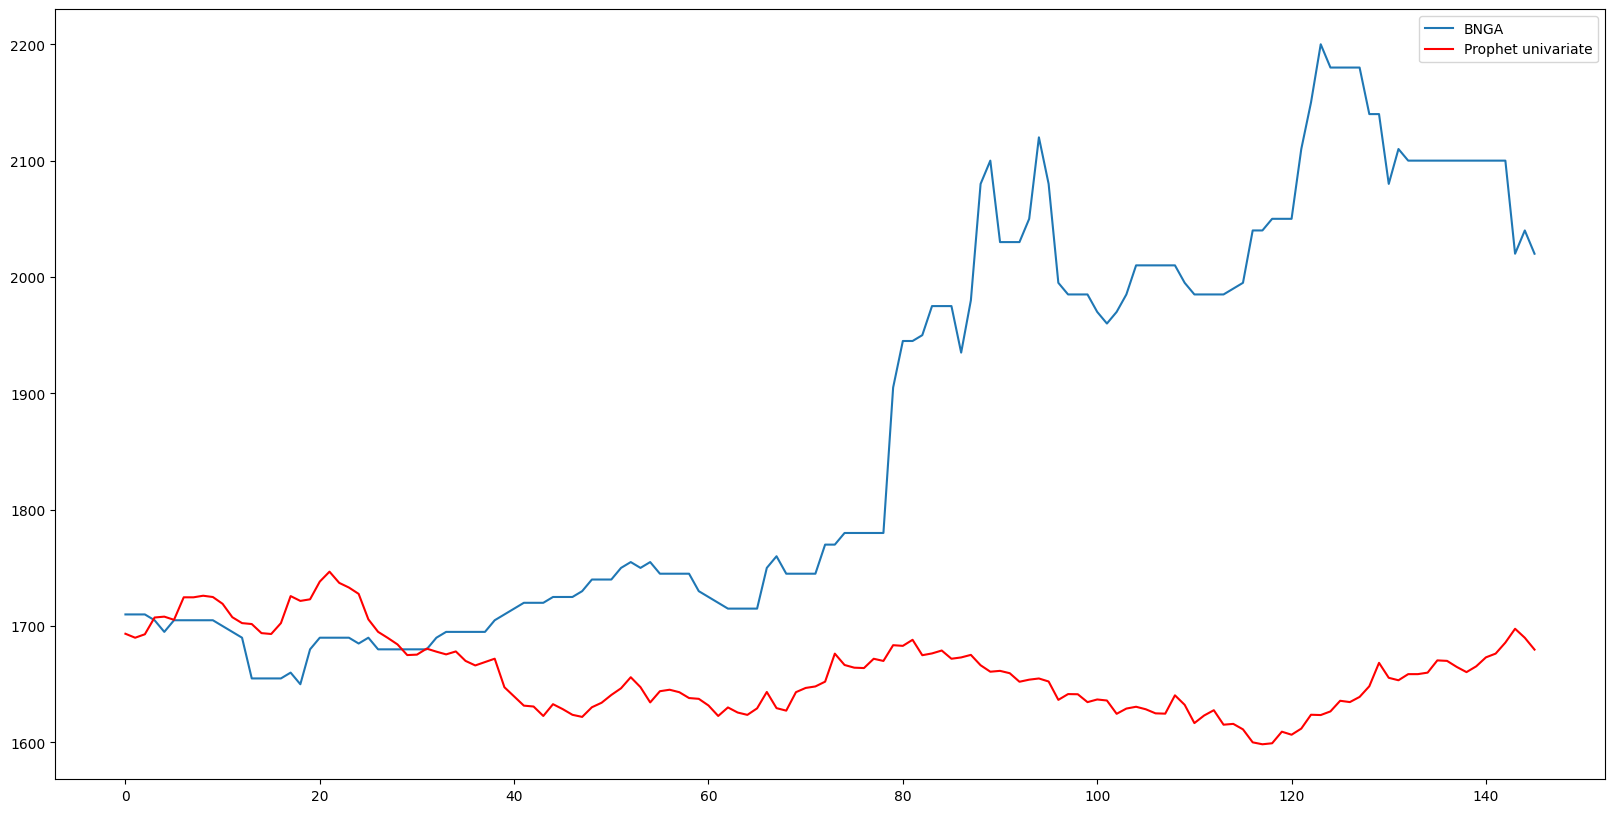

In [ ]:
plt.plot(df_test.BNGA.values, label='BNGA')
plt.plot(yhat11.yhat, color='red', label='Prophet univariate')
plt.legend()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.BNGA.array, yhat11.yhat.array)
mape11 = mean_absolute_percentage_error(df_test.BNGA.array, yhat11.yhat.array)
mse = mean_squared_error(df_test.BNGA.array, yhat11.yhat.array)
rmse = sqrt(mean_squared_error(df_test.BNGA.array, yhat11.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape11)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 216.4779759319963
Mean Absolute Percentage Error 0.10850278969900813
mean_squared_error 77944.78803539519
root_mean_squared_error 279.18593810468894


# MAPE

In [ ]:
mapes = [mape, mape1, mape2,mape3,mape4,mape5,mape6,mape7,mape8,mape9,mape10,mape11]
nama_bank = ['BBRI', 'BBTN', 'BMRI', 'NISP', 'BBNI', 'BBCA', 'BANK', 'MEGA', 'BRIS', 'ARTO', 'BBYB', 'BNGA']

In [ ]:
df_mape = pd.DataFrame({
    'Nama Bank': nama_bank,
    'MAPE': mapes,
})
df_mape['MAPE'] = df_mape['MAPE'] * 100

df_mape['Akurasi'] = 100 - df_mape['MAPE']

df_mape['MAPE'] = df_mape['MAPE'].round(2)
df_mape['Akurasi'] = df_mape['Akurasi'].round(2)

In [ ]:
df_mape

,Nama Bank,MAPE,Akurasi
0,BBRI,4.09,95.91
1,BBTN,5.79,94.21
2,BMRI,3.62,96.38
3,NISP,9.73,90.27
4,BBNI,5.53,94.47
5,BBCA,5.25,94.75
6,BANK,12.05,87.95
7,MEGA,6.62,93.38
8,BRIS,6.06,93.94
9,ARTO,28.87,71.13


# Forecast

## BBRI

In [ ]:
forecast = df1.rename(
    columns={'BBRI': 'y'})
forecast['ds'] = forecast.index
forecast.index = pd.RangeIndex(len(forecast.index))

In [ ]:
pBBRI = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [ ]:
pBBRI.fit(forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/0u5may2u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/coi7_z7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31314', 'data', 'file=/tmp/tmpc1oheima/0u5may2u.json', 'init=/tmp/tmpc1oheima/coi7_z7o.json', 'output', 'file=/tmp/tmpc1oheima/prophet_modelqdxpqk3x/prophet_model-20240527002129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = pBBRI.make_future_dataframe(periods=5)

fBBRI = pBBRI.predict(future)

In [ ]:
forecast_5_days = fBBRI[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,5317.845419,5247.920983,5392.066392
733,2024-04-20,5274.850284,5199.830105,5354.702195
734,2024-04-21,5257.152624,5182.309074,5333.609542
735,2024-04-22,5242.656774,5171.924138,5316.537578
736,2024-04-23,5222.837096,5152.738083,5300.833951


## BBTN

In [ ]:
forecast1 = df1.rename(
    columns={'BBTN': 'y'})
forecast1['ds'] = forecast1.index
forecast1.index = pd.RangeIndex(len(forecast1.index))

In [ ]:
pBBTN = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [ ]:
pBBTN.fit(forecast1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/h63goue3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/apfe_x5l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41625', 'data', 'file=/tmp/tmpc1oheima/h63goue3.json', 'init=/tmp/tmpc1oheima/apfe_x5l.json', 'output', 'file=/tmp/tmpc1oheima/prophet_model36jmfhuj/prophet_model-20240527002133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future1 = pBBTN.make_future_dataframe(periods=5)

fBBTN = pBBTN.predict(future1)

In [ ]:
forecast_5_days1 = fBBTN[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days1

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,1431.977700,1401.201607,1462.687652
733,2024-04-20,1440.083228,1410.123426,1471.583812
734,2024-04-21,1443.497287,1412.191079,1470.818387
735,2024-04-22,1451.160733,1419.129830,1482.363280
736,2024-04-23,1425.756537,1392.914957,1455.453267


## BMRI

In [ ]:
forecast2 = df1.rename(
    columns={'BMRI': 'y'})
forecast2['ds'] = forecast2.index
forecast2.index = pd.RangeIndex(len(forecast2.index))

In [ ]:
pBMRI = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [ ]:
pBMRI.fit(forecast2)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/89s33wwp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/93ckzdvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77323', 'data', 'file=/tmp/tmpc1oheima/89s33wwp.json', 'init=/tmp/tmpc1oheima/93ckzdvy.json', 'output', 'file=/tmp/tmpc1oheima/prophet_model9xwfexcg/prophet_model-20240527002138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future2 = pBMRI.make_future_dataframe(periods=5)

fBMRI = pBMRI.predict(future2)

In [ ]:
forecast_5_days2 = fBMRI[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days2

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,6599.820179,6522.022089,6671.176031
733,2024-04-20,6575.383446,6501.771432,6649.889359
734,2024-04-21,6523.085882,6449.641997,6599.964437
735,2024-04-22,6440.653176,6365.518418,6519.726868
736,2024-04-23,6381.585561,6303.333306,6461.225043


## NISP

In [ ]:
forecast3 = df1.rename(
    columns={'NISP': 'y'})
forecast3['ds'] = forecast3.index
forecast3.index = pd.RangeIndex(len(forecast3.index))

In [ ]:
pNISP = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=20
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=10
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=40
)

In [ ]:
pNISP.fit(forecast3)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/xqlppwa5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/ugq4d2i8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99807', 'data', 'file=/tmp/tmpc1oheima/xqlppwa5.json', 'init=/tmp/tmpc1oheima/ugq4d2i8.json', 'output', 'file=/tmp/tmpc1oheima/prophet_modela7u_wira/prophet_model-20240527002144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future3 = pNISP.make_future_dataframe(periods=5)

fNISP = pNISP.predict(future3)

In [ ]:
forecast_5_days3 = fNISP[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days3

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,1273.969314,1261.001331,1287.100106
733,2024-04-20,1257.374848,1244.815188,1270.801329
734,2024-04-21,1244.850769,1232.232535,1259.558651
735,2024-04-22,1248.069977,1235.088735,1263.412259
736,2024-04-23,1241.153339,1226.434358,1255.005894


## BBNI

In [ ]:
forecast4 = df1.rename(
    columns={'BBNI': 'y'})
forecast4['ds'] = forecast4.index
forecast4.index = pd.RangeIndex(len(forecast4.index))

In [ ]:
pBBNI = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=20
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=35
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [ ]:
pBBNI.fit(forecast4)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/ucou_ek_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/5q_mlera.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79127', 'data', 'file=/tmp/tmpc1oheima/ucou_ek_.json', 'init=/tmp/tmpc1oheima/5q_mlera.json', 'output', 'file=/tmp/tmpc1oheima/prophet_model0zbgw8dr/prophet_model-20240527002224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:22:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future4 = pBBNI.make_future_dataframe(periods=5)

fBBNI = pBBNI.predict(future4)

In [ ]:
forecast_5_days4 = fBBNI[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days4

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,5069.906787,4993.584951,5147.244550
733,2024-04-20,5080.678526,5007.649992,5147.188570
734,2024-04-21,5059.429044,4983.674943,5129.108516
735,2024-04-22,5067.070469,4992.938153,5142.853937
736,2024-04-23,5057.031392,4972.107986,5132.167779


## BBCA


In [ ]:
forecast5 = df1.rename(
    columns={'BBCA': 'y'})
forecast5['ds'] = forecast5.index
forecast5.index = pd.RangeIndex(len(forecast5.index))

In [ ]:
pBBCA = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=15
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=35
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=40
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [ ]:
pBBCA.fit(forecast5)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/vs7g936d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/ox2tbchd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90256', 'data', 'file=/tmp/tmpc1oheima/vs7g936d.json', 'init=/tmp/tmpc1oheima/ox2tbchd.json', 'output', 'file=/tmp/tmpc1oheima/prophet_modelu31invyu/prophet_model-20240527011153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:11:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future5 = pBBCA.make_future_dataframe(periods=5)

fBBCA = pBBCA.predict(future5)

In [ ]:
forecast_5_days5 = fBBCA[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days5

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,9497.189264,9404.736552,9593.993395
733,2024-04-20,9461.154225,9369.757651,9556.527556
734,2024-04-21,9422.557749,9326.975975,9530.151403
735,2024-04-22,9404.738712,9304.597762,9511.688297
736,2024-04-23,9348.224381,9253.115081,9446.390674


## BANK

In [ ]:
forecast6 = df1.rename(
    columns={'BANK': 'y'})
forecast6['ds'] = forecast6.index
forecast6.index = pd.RangeIndex(len(forecast6.index))

In [ ]:
pBANK = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=35
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=40
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [ ]:
pBANK.fit(forecast6)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/h5zxzh34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/tc8bub59.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57730', 'data', 'file=/tmp/tmpc1oheima/h5zxzh34.json', 'init=/tmp/tmpc1oheima/tc8bub59.json', 'output', 'file=/tmp/tmpc1oheima/prophet_modelue_0cxry/prophet_model-20240527002404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future6 = pBANK.make_future_dataframe(periods=5)

fBANK = pBANK.predict(future6)

In [ ]:
forecast_5_days6 = fBANK[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days6

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,975.615839,931.782405,1026.592719
733,2024-04-20,940.009939,893.249306,992.041356
734,2024-04-21,925.268749,871.456697,976.331772
735,2024-04-22,939.591235,887.304156,987.797324
736,2024-04-23,928.162409,876.781176,982.636209


## MEGA

In [ ]:
forecast7 = df1.rename(
    columns={'MEGA': 'y'})
forecast7['ds'] = forecast7.index
forecast7.index = pd.RangeIndex(len(forecast7.index))

In [ ]:
pMEGA = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=15
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [ ]:
pMEGA.fit(forecast7)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/w7smv1w9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/fhqndy4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71611', 'data', 'file=/tmp/tmpc1oheima/w7smv1w9.json', 'init=/tmp/tmpc1oheima/fhqndy4z.json', 'output', 'file=/tmp/tmpc1oheima/prophet_modelylr14wsi/prophet_model-20240527002409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future7 = pMEGA.make_future_dataframe(periods=5)

fMEGA = pMEGA.predict(future7)

In [ ]:
forecast_5_days7 = fMEGA[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days7

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,5146.631008,5073.035947,5219.103196
733,2024-04-20,5195.882548,5118.124518,5277.471306
734,2024-04-21,5179.655537,5100.385061,5257.235938
735,2024-04-22,5159.102883,5079.471691,5233.444671
736,2024-04-23,5136.453978,5057.279311,5211.929456


## BRIS

In [ ]:
forecast8 = df1.rename(
    columns={'BRIS': 'y'})
forecast8['ds'] = forecast8.index
forecast8.index = pd.RangeIndex(len(forecast8.index))

In [ ]:
pBRIS = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=35
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [ ]:
pBRIS.fit(forecast8)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/ykqdcacj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/6ikgfc_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42693', 'data', 'file=/tmp/tmpc1oheima/ykqdcacj.json', 'init=/tmp/tmpc1oheima/6ikgfc_m.json', 'output', 'file=/tmp/tmpc1oheima/prophet_model14fl5iae/prophet_model-20240527002415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future8 = pBRIS.make_future_dataframe(periods=5)

fBRIS = pBRIS.predict(future8)

In [ ]:
forecast_5_days8 = fBRIS[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days8

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,2533.471801,2484.396394,2580.627726
733,2024-04-20,2507.464000,2459.202381,2558.770392
734,2024-04-21,2479.371361,2429.989359,2526.344064
735,2024-04-22,2458.042206,2411.897378,2503.409345
736,2024-04-23,2494.436118,2444.212563,2544.028378


## ARTO

In [ ]:
forecast9 = df1.rename(
    columns={'ARTO': 'y'})
forecast9['ds'] = forecast9.index
forecast9.index = pd.RangeIndex(len(forecast9.index))

In [ ]:
pARTO = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=40
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [ ]:
pARTO.fit(forecast9)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/lhfx520w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/w5gej3dc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95773', 'data', 'file=/tmp/tmpc1oheima/lhfx520w.json', 'init=/tmp/tmpc1oheima/w5gej3dc.json', 'output', 'file=/tmp/tmpc1oheima/prophet_model_u2zdwgb/prophet_model-20240527002420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future9 = pARTO.make_future_dataframe(periods=5)

fARTO = pARTO.predict(future9)

In [ ]:
forecast_5_days9 = fARTO[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days9

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,2552.866627,2116.424165,2999.633091
733,2024-04-20,2620.124425,2182.818653,3036.970716
734,2024-04-21,2666.457380,2268.590949,3128.268851
735,2024-04-22,2741.378531,2313.347897,3145.011580
736,2024-04-23,2933.467595,2490.757157,3389.635424


## BBYB

In [ ]:
forecast10 = df1.rename(
    columns={'BBYB': 'y'})
forecast10['ds'] = forecast10.index
forecast10.index = pd.RangeIndex(len(forecast10.index))

In [ ]:
pBBYB = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=15
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=55
)

In [ ]:
pBBYB.fit(forecast10)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/ujbbfj_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/kx0z6fdw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6957', 'data', 'file=/tmp/tmpc1oheima/ujbbfj_a.json', 'init=/tmp/tmpc1oheima/kx0z6fdw.json', 'output', 'file=/tmp/tmpc1oheima/prophet_modelmrbxact0/prophet_model-20240527002422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future10 = pBBYB.make_future_dataframe(periods=5)

fBBYB = pBBYB.predict(future10)

In [ ]:
forecast_5_days10 = fBBYB[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days10

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,310.465126,237.898557,380.683101
733,2024-04-20,316.919724,248.999244,390.501133
734,2024-04-21,318.491127,254.165533,387.166380
735,2024-04-22,312.319547,239.362113,382.933815
736,2024-04-23,309.657419,243.396241,385.218969


## BNGA

In [ ]:
forecast11 = df1.rename(
    columns={'BNGA': 'y'})
forecast11['ds'] = forecast11.index
forecast11.index = pd.RangeIndex(len(forecast11.index))

In [ ]:
pBNGA = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [ ]:
pBNGA.fit(forecast11)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/qixirpeb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1oheima/wb_ckr16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76426', 'data', 'file=/tmp/tmpc1oheima/qixirpeb.json', 'init=/tmp/tmpc1oheima/wb_ckr16.json', 'output', 'file=/tmp/tmpc1oheima/prophet_model73aqpvp1/prophet_model-20240527002424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future11 = pBNGA.make_future_dataframe(periods=5)

fBNGA = pBNGA.predict(future11)

In [ ]:
forecast_5_days11 = fBNGA[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
forecast_5_days11

,ds,yhat,yhat_lower,yhat_upper
732,2024-04-19,2097.591562,2068.467301,2126.184439
733,2024-04-20,2109.039847,2082.874924,2138.567424
734,2024-04-21,2118.045620,2088.102400,2147.300995
735,2024-04-22,2126.107954,2097.690476,2154.380794
736,2024-04-23,2125.308785,2096.039703,2154.900486


# Save Result

## Train Test

In [ ]:
data = {
    'Date': df_test.index,
    'BBRI': yhat.yhat.array,
    'BBTN': yhat1.yhat.array,
    'BBYB': yhat10.yhat.array,
    'BMRI': yhat2.yhat.array,
    'BNGA': yhat11.yhat.array,
    'BRIS': yhat8.yhat.array,
    'BBCA': yhat5.yhat.array,
    'BBNI': yhat4.yhat.array,
    'BANK': yhat6.yhat.array,
    'ARTO': yhat9.yhat.array,
    'MEGA': yhat7.yhat.array,
    'NISP': yhat3.yhat.array,
}

In [ ]:
df_forecast = pd.DataFrame(data)

In [ ]:
df_forecast

,Date,BBRI,BBTN,BBYB,BMRI,BNGA,BRIS,BBCA,BBNI,BANK,ARTO,MEGA,NISP
0,2023-11-25,5058.684924,1213.341794,316.410555,5580.903310,1693.393244,1643.944165,8806.651165,4950.314793,1027.292231,2368.392796,5017.525148,1041.405573
1,2023-11-26,5065.586327,1224.470448,323.264951,5613.215950,1689.979569,1652.742425,8753.029809,4994.351115,1021.069357,2375.596120,5030.191514,1050.355205
2,2023-11-27,5106.754205,1238.903683,324.685920,5649.030808,1692.949491,1665.536221,8762.687181,5025.794317,1001.696782,2130.509501,5048.035058,1058.347883
3,2023-11-28,5193.428140,1252.875964,326.061648,5646.720675,1707.352798,1656.472148,8857.770520,5128.391251,994.495434,1995.622242,5086.758585,1067.019262
4,2023-11-29,5201.267605,1268.295006,301.382885,5624.895802,1708.106045,1645.300992,8912.711085,5173.831112,991.624913,1842.556357,5081.305109,1078.760319
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2024-04-14,6552.892597,1448.012478,312.243636,7322.090614,1676.337192,2758.395655,9822.825872,6235.291498,1085.498047,3676.185456,5508.959056,1098.146125
142,2024-04-15,6568.762616,1445.761916,328.133546,7389.345958,1685.794115,2746.417717,9866.056420,6256.061860,1086.826797,3591.271129,5464.523777,1086.172974
143,2024-04-16,6558.369267,1460.173559,348.928689,7366.384768,1697.683726,2712.128797,9834.850291,6292.818699,1089.451195,3630.705885,5511.913827,1086.021054
144,2024-04-17,6505.637449,1466.701367,369.358544,7386.478649,1689.951010,2733.466620,9856.930083,6249.904920,1097.176038,3716.401632,5478.640820,1078.720825


In [ ]:
df_forecast.to_csv("evaluasi.csv")

## Forecast

In [ ]:
result = {
    'Date': forecast_5_days.ds,
    'BBRI': forecast_5_days.yhat.array,
    'BBTN': forecast_5_days1.yhat.array,
    'BBYB': forecast_5_days10.yhat.array,
    'BMRI': forecast_5_days2.yhat.array,
    'BNGA': forecast_5_days11.yhat.array,
    'BRIS': forecast_5_days8.yhat.array,
    'BBCA': forecast_5_days5.yhat.array,
    'BBNI': forecast_5_days4.yhat.array,
    'BANK': forecast_5_days6.yhat.array,
    'ARTO': forecast_5_days9.yhat.array,
    'MEGA': forecast_5_days7.yhat.array,
    'NISP': forecast_5_days3.yhat.array,
}

In [ ]:
fcast = pd.DataFrame(result)
fcast['Date'] = pd.to_datetime(fcast['Date'])
fcast = fcast.set_index('Date')

In [ ]:
fcast.head(5)

,BBRI,BBTN,BBYB,BMRI,BNGA,BRIS,BBCA,BBNI,BANK,ARTO,MEGA,NISP
Date,,,,,,,,,,,,
2024-04-19,5317.845419,1431.977700,310.465126,6599.820179,2097.591562,2533.471801,9497.189264,5069.906787,975.615839,2552.866627,5146.631008,1273.969314
2024-04-20,5274.850284,1440.083228,316.919724,6575.383446,2109.039847,2507.464000,9461.154225,5080.678526,940.009939,2620.124425,5195.882548,1257.374848
2024-04-21,5257.152624,1443.497287,318.491127,6523.085882,2118.045620,2479.371361,9422.557749,5059.429044,925.268749,2666.457380,5179.655537,1244.850769
2024-04-22,5242.656774,1451.160733,312.319547,6440.653176,2126.107954,2458.042206,9404.738712,5067.070469,939.591235,2741.378531,5159.102883,1248.069977
2024-04-23,5222.837096,1425.756537,309.657419,6381.585561,2125.308785,2494.436118,9348.224381,5057.031392,928.162409,2933.467595,5136.453978,1241.153339


In [ ]:
fcast.to_csv('Forecast.csv')

In [ ]:
combined_df = pd.concat([df1, fcast], ignore_index=True)

In [ ]:
combined_df.tail(15)

,BBRI,BBTN,BBYB,BMRI,BNGA,BRIS,BBCA,BBNI,BANK,ARTO,MEGA,NISP
722,5650.000000,1500.000000,268.000000,6825.000000,2100.000000,2700.000000,9825.000000,5300.000000,1000.000000,2530.000000,5150.000000,1350.000000
723,5650.000000,1500.000000,268.000000,6825.000000,2100.000000,2700.000000,9825.000000,5300.000000,1000.000000,2530.000000,5150.000000,1350.000000
724,5650.000000,1500.000000,268.000000,6825.000000,2100.000000,2700.000000,9825.000000,5300.000000,1000.000000,2530.000000,5150.000000,1350.000000
725,5650.000000,1500.000000,268.000000,6825.000000,2100.000000,2700.000000,9825.000000,5300.000000,1000.000000,2530.000000,5150.000000,1350.000000
726,5650.000000,1500.000000,268.000000,6825.000000,2100.000000,2700.000000,9825.000000,5300.000000,1000.000000,2530.000000,5150.000000,1350.000000
727,5650.000000,1500.000000,268.000000,6825.000000,2100.000000,2700.000000,9825.000000,5300.000000,1000.000000,2530.000000,5150.000000,1350.000000
728,5650.000000,1500.000000,268.000000,6825.000000,2100.000000,2700.000000,9825.000000,5300.000000,1000.000000,2530.000000,5150.000000,1350.000000
729,5350.000000,1400.000000,252.000000,6625.000000,2020.000000,2550.000000,9475.000000,5200.000000,980.000000,2300.000000,5075.000000,1300.000000
730,5300.000000,1375.000000,260.000000,6625.000000,2040.000000,2480.000000,9525.000000,5250.000000,955.000000,2120.000000,5175.000000,1300.000000
731,5475.000000,1420.000000,254.000000,6800.000000,2020.000000,2600.000000,9475.000000,5300.000000,990.000000,2160.000000,5150.000000,1310.000000


## Return

In [ ]:
returns = combined_df.pct_change().dropna()

In [ ]:
returns.tail(5)

,BBRI,BBTN,BBYB,BMRI,BNGA,BRIS,BBCA,BBNI,BANK,ARTO,MEGA,NISP
732,-0.028704,0.008435,0.222304,-0.029438,0.038412,-0.025588,0.002342,-0.043414,-0.014529,0.181883,-0.000654,-0.027504
733,-0.008085,0.005660,0.020790,-0.003703,0.005458,-0.010266,-0.003794,0.002125,-0.036496,0.026346,0.009570,-0.013026
734,-0.003355,0.002371,0.004958,-0.007954,0.004270,-0.011204,-0.004079,-0.004182,-0.015682,0.017683,-0.003123,-0.009960
735,-0.002757,0.005309,-0.019378,-0.012637,0.003806,-0.008603,-0.001891,0.001510,0.015479,0.028098,-0.003968,0.002586
736,-0.003780,-0.017506,-0.008524,-0.009171,-0.000376,0.014806,-0.006009,-0.001981,-0.012164,0.070070,-0.004390,-0.005542


## Volatility

In [ ]:
std_devs = returns.std()
std_devs = pd.DataFrame(list(std_devs.items()), columns=['Bank', 'Volatility'])

In [ ]:
std_devs.set_index('Bank', inplace=True)

In [ ]:
std_devs

,Volatility
Bank,
BBRI,0.012260
BBTN,0.014595
BBYB,0.037883
BMRI,0.013378
BNGA,0.011141
BRIS,0.020597
BBCA,0.010432
BBNI,0.012228
BANK,0.026773


## Value at Risk

In [ ]:
num_simulations = 10000
num_days = 5
confidence_level = 0.95

In [ ]:
def monte_carlo_var(returns, num_simulations, num_days, confidence_level):
    # Menghitung rata-rata dan standar deviasi return
    mean_returns = returns.mean()
    std_dev_returns = returns.std()

    # Menyiapkan array untuk menyimpan hasil simulasi
    simulated_end_prices = np.zeros((num_simulations, len(returns.columns)))

    for i in range(num_simulations):
        # Menghasilkan jalur harga masa depan
        simulated_return = np.random.normal(mean_returns, std_dev_returns, (num_days, len(returns.columns)))
        simulated_end_prices[i, :] = (1 + simulated_return).prod(axis=0)

    # Menghitung distribusi kerugian
    simulated_returns = pd.DataFrame(simulated_end_prices, columns=returns.columns)
    simulated_loss = simulated_returns.apply(lambda x: 1 - x)

    # Menghitung VaR
    var = simulated_loss.quantile(1 - confidence_level)

    return var

In [ ]:
# Menghitung VaR untuk setiap bank
var_results = monte_carlo_var(returns, num_simulations, num_days, confidence_level)

# Menampilkan hasil VaR
var_results = pd.DataFrame(var_results)

In [ ]:
var_results.rename(columns={0.050000000000000044: 'VaR'}, inplace=True)

In [ ]:
var_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, BBRI to NISP
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VaR     12 non-null     float64
dtypes: float64(1)
memory usage: 492.0+ bytes


In [ ]:
# df.set_index('Bank', inplace=True)

# Investasi dalam Rupiah
investment_levels = [100000000, 500000000, 1000000000]

# Menambahkan kolom untuk setiap level investasi dan menghitung kerugian potensial
for investment in investment_levels:
    column_name = f'Loss_{investment:,} IDR'
    var_results[column_name] = -var_results['VaR'] * investment

# Final Result

In [ ]:
final_df = pd.merge(var_results, std_devs, left_index=True, right_index=True, how='outer')

In [ ]:
final_df1 = pd.merge(final_df, df_mape, left_index=True, right_on='Nama Bank', how='outer')

In [ ]:
final_df1.set_index('Nama Bank', inplace=True)

In [ ]:
final_df1

,VaR,"Loss_100,000,000 IDR","Loss_500,000,000 IDR","Loss_1,000,000,000 IDR",Volatility,MAPE,Akurasi
Nama Bank,,,,,,,
BBRI,-0.047531,4.753137e+06,2.376568e+07,4.753137e+07,0.012260,4.09,95.91
BBTN,-0.056281,5.628061e+06,2.814030e+07,5.628061e+07,0.014595,5.79,94.21
BBYB,-0.135619,1.356193e+07,6.780966e+07,1.356193e+08,0.037883,24.70,75.30
BMRI,-0.055122,5.512166e+06,2.756083e+07,5.512166e+07,0.013378,3.62,96.38
BNGA,-0.046642,4.664213e+06,2.332106e+07,4.664213e+07,0.011141,10.85,89.15
BRIS,-0.081752,8.175170e+06,4.087585e+07,8.175170e+07,0.020597,6.06,93.94
BBCA,-0.040466,4.046621e+06,2.023311e+07,4.046621e+07,0.010432,5.25,94.75
BBNI,-0.047683,4.768307e+06,2.384154e+07,4.768307e+07,0.012228,5.53,94.47
BANK,-0.097683,9.768258e+06,4.884129e+07,9.768258e+07,0.026773,12.05,87.95


In [ ]:
final_df1.to_csv("final_data.csv")